In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pykalman import KalmanFilter
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import signal
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D

Comments


In [2]:
walk1=pd.read_csv("walk1.csv")
walk1['Activity']='1'
walk2=pd.read_csv("walk2.csv")
walk2['Activity']='1'
walk3=pd.read_csv("walk3.csv")
walk3['Activity']='1'
walk4=pd.read_csv("walk4.csv")
walk4['Activity']='1'
walk5=pd.read_csv("walk5.csv")
walk5['Activity']='1'
walk6=pd.read_csv("walk6.csv")
walk6['Activity']='1'
walk7=pd.read_csv("walk7.csv")
walk7['Activity']='1'
walk8=pd.read_csv("walk8.csv")
walk8['Activity']='1'
walk9=pd.read_csv("walk9.csv")
walk9['Activity']='1'
walk10=pd.read_csv("walk10.csv")
walk10['Activity']='1'


In [3]:
walkdf=[walk1,walk2,walk3,walk4,walk5,walk6,walk7,walk8,walk9,walk10]
walkdf

[         time    gFx    gFy    gFz    acc Activity
 0     50:58.7 -0.030 -0.200 -0.809  0.834        1
 1     50:58.7 -0.003 -0.233 -0.854  0.885        1
 2     50:58.7 -0.038 -0.330 -0.879  0.940        1
 3     50:58.8 -0.074 -0.390 -0.885  0.970        1
 4     50:58.8 -0.123 -0.459 -1.032  1.136        1
 ...       ...    ...    ...    ...    ...      ...
 1832  51:25.5 -0.173 -0.348 -1.047  1.117        1
 1833  51:25.5 -0.173 -0.348 -1.047  1.117        1
 1834  51:25.5 -0.167 -0.333 -1.070  1.133        1
 1835  51:25.5 -0.167 -0.333 -1.070  1.133        1
 1836  51:25.5 -0.161 -0.329 -1.074  1.135        1
 
 [1837 rows x 6 columns],
          time    gFx    gFy    gFz    acc Activity
 0     51:35.0  0.031 -0.279 -0.878  0.922        1
 1     51:35.0  0.031 -0.279 -0.878  0.922        1
 2     51:35.0  0.064 -0.287 -0.925  0.971        1
 3     51:35.0  0.098 -0.312 -0.944  0.999        1
 4     51:35.0  0.111 -0.325 -0.936  0.997        1
 ...       ...    ...    ...    ... 

In [4]:
standing1=pd.read_csv("standing1.csv")
standing1['Activity']='0'
standing2=pd.read_csv("standing2.csv")
standing2['Activity']='0'
standing3=pd.read_csv("standing3.csv")
standing3['Activity']='0'
standing4=pd.read_csv("standing4.csv")
standing4['Activity']='0'
standing5=pd.read_csv("standing5.csv")
standing5['Activity']='0'
standing6=pd.read_csv("standing6.csv")
standing6['Activity']='0'
standing7=pd.read_csv("standing7.csv")
standing7['Activity']='0'
standing8=pd.read_csv("standing8.csv")
standing8['Activity']='0'
standing9=pd.read_csv("standing9.csv")
standing9['Activity']='0'
standing10=pd.read_csv("standing10.csv")
standing10['Activity']='0'




In [5]:
standingdf=[standing1,standing2,standing3,standing4,standing5,standing6,standing7,standing8,standing9,standing10]


In [6]:
running1=pd.read_csv("running1.csv")
running1['Activity']='2'
running2=pd.read_csv("running2.csv")
running2['Activity']='2'
running3=pd.read_csv("running3.csv")
running3['Activity']='2'
running4=pd.read_csv("running4.csv")
running4['Activity']='2'
running5=pd.read_csv("running5.csv")
running5['Activity']='2'
running6=pd.read_csv("running6.csv")
running6['Activity']='2'
running7=pd.read_csv("running7.csv")
running7['Activity']='2'
running8=pd.read_csv("running8.csv")
running8['Activity']='2'
running9=pd.read_csv("running9.csv")
running9['Activity']='2'
running10=pd.read_csv("running10.csv")
running10['Activity']='2'

In [7]:
runningdf=[running1,running2,running3,running4,running5,running6,running7,running8,running9,running10]
runningdf

[        time    gFx    gFy    gFz    acc Activity
 0    05:47.3  0.004 -0.371 -0.446  0.580        2
 1    05:47.3  0.004 -0.371 -0.446  0.580        2
 2    05:47.3  0.072 -0.441 -0.490  0.663        2
 3    05:47.3  0.102 -0.469 -0.476  0.676        2
 4    05:47.4  0.085 -0.464 -0.471  0.667        2
 ..       ...    ...    ...    ...    ...      ...
 723  06:01.5 -0.344 -0.336 -0.823  0.953        2
 724  06:01.5 -0.346 -0.334 -0.895  1.016        2
 725  06:01.6 -0.336 -0.434 -0.943  1.091        2
 726  06:01.6 -0.331 -0.527 -1.000  1.178        2
 727  06:01.6 -0.384 -0.537 -0.986  1.187        2
 
 [728 rows x 6 columns],
         time    gFx    gFy    gFz    acc Activity
 0    09:13.1  0.062 -0.366 -1.703  1.743        2
 1    09:13.1  0.076 -0.358 -1.667  1.707        2
 2    09:13.1  0.092 -0.345 -1.607  1.646        2
 3    09:13.2  0.116 -0.305 -1.570  1.604        2
 4    09:13.2  0.117 -0.297 -1.419  1.454        2
 ..       ...    ...    ...    ...    ...      ...
 866

In [8]:

#using low pass filter 
b, a = signal.butter(3, 0.1, btype='lowpass', analog=False)
walk_np=list(walkdf)
standing_np=list(standingdf)
running_np=list(runningdf)


In [9]:
butter_worth_walk = []
for i in range(10):
    butter_worth_walkX = signal.filtfilt(b, a, walk_np[i]["gFx"])
    butter_worth_walkY = signal.filtfilt(b, a, walk_np[i]["gFy"])
    butter_worth_walkZ = signal.filtfilt(b, a, walk_np[i]["gFz"])
    #butter_worth_walk_L =signal.filtfilt(b, a,walk_np[i]["acc"])
    
    
    butter_worth_walk.append((pd.DataFrame(list(zip(walk_np[i]['time'],butter_worth_walkX, butter_worth_walkY, butter_worth_walkZ,walk_np[i]['acc'],walk_np[i]['Activity'])),
                                            columns=["Time","AccX", "AccY", "AccZ","Acc-old","Activity"])))
    
    
    
    
   
    
    

In [10]:
butter_worth_walk[0]


Time      AccX      AccY      AccZ  Acc-old Activity
0     50:58.7 -0.034059 -0.193109 -0.792666    0.834        1
1     50:58.7 -0.054152 -0.217680 -0.793732    0.885        1
2     50:58.7 -0.072244 -0.240606 -0.794303    0.940        1
3     50:58.8 -0.086890 -0.260312 -0.793582    0.970        1
4     50:58.8 -0.096815 -0.275805 -0.791350    1.136        1
...       ...       ...       ...       ...      ...      ...
1832  51:25.5 -0.139699 -0.451786 -1.018895    1.117        1
1833  51:25.5 -0.146444 -0.419644 -1.031833    1.117        1
1834  51:25.5 -0.152605 -0.387077 -1.045610    1.133        1
1835  51:25.5 -0.158078 -0.354912 -1.059830    1.133        1
1836  51:25.5 -0.162865 -0.323798 -1.074105    1.135        1

[1837 rows x 6 columns]

In [11]:
for i in range(10):
    butter_worth_walk[i]["Acc-trns"] = np.sqrt(butter_worth_walk[i]["AccX"]**2 * 
                                                     butter_worth_walk[i]["AccY"]**2 *
                                                     butter_worth_walk[i]["AccZ"]**2 ) 
    
butter_worth_walk

[         Time      AccX      AccY      AccZ  Acc-old Activity  Acc-trns
 0     50:58.7 -0.034059 -0.193109 -0.792666    0.834        1  0.005214
 1     50:58.7 -0.054152 -0.217680 -0.793732    0.885        1  0.009356
 2     50:58.7 -0.072244 -0.240606 -0.794303    0.940        1  0.013807
 3     50:58.8 -0.086890 -0.260312 -0.793582    0.970        1  0.017950
 4     50:58.8 -0.096815 -0.275805 -0.791350    1.136        1  0.021131
 ...       ...       ...       ...       ...      ...      ...       ...
 1832  51:25.5 -0.139699 -0.451786 -1.018895    1.117        1  0.064306
 1833  51:25.5 -0.146444 -0.419644 -1.031833    1.117        1  0.063411
 1834  51:25.5 -0.152605 -0.387077 -1.045610    1.133        1  0.061764
 1835  51:25.5 -0.158078 -0.354912 -1.059830    1.133        1  0.059461
 1836  51:25.5 -0.162865 -0.323798 -1.074105    1.135        1  0.056643
 
 [1837 rows x 7 columns],
          Time      AccX      AccY      AccZ  Acc-old Activity  Acc-trns
 0     51:35.0  0.02852

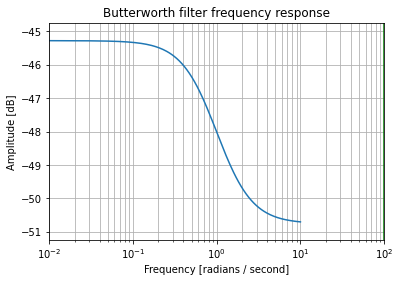

In [12]:

########Walking data########
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()


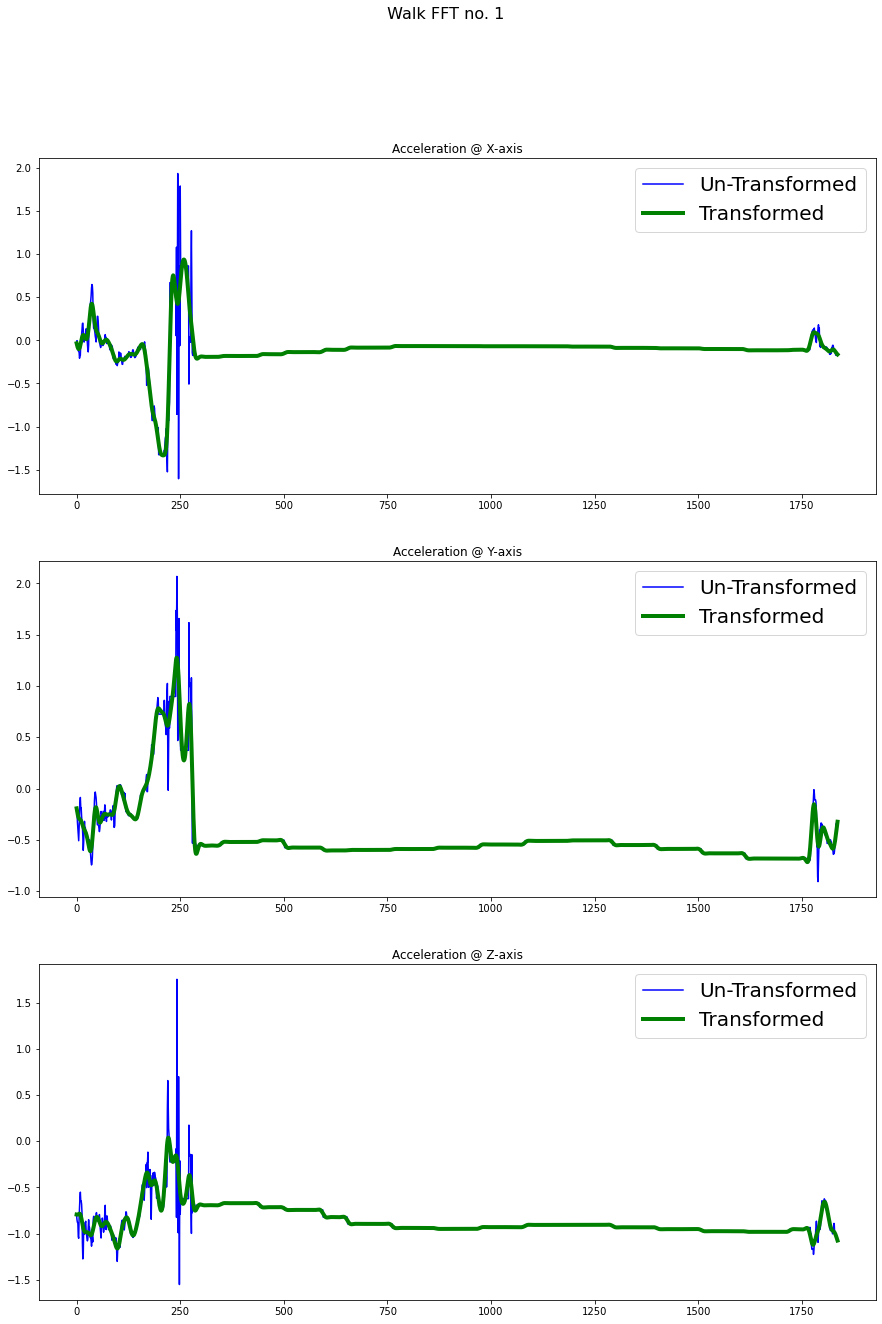

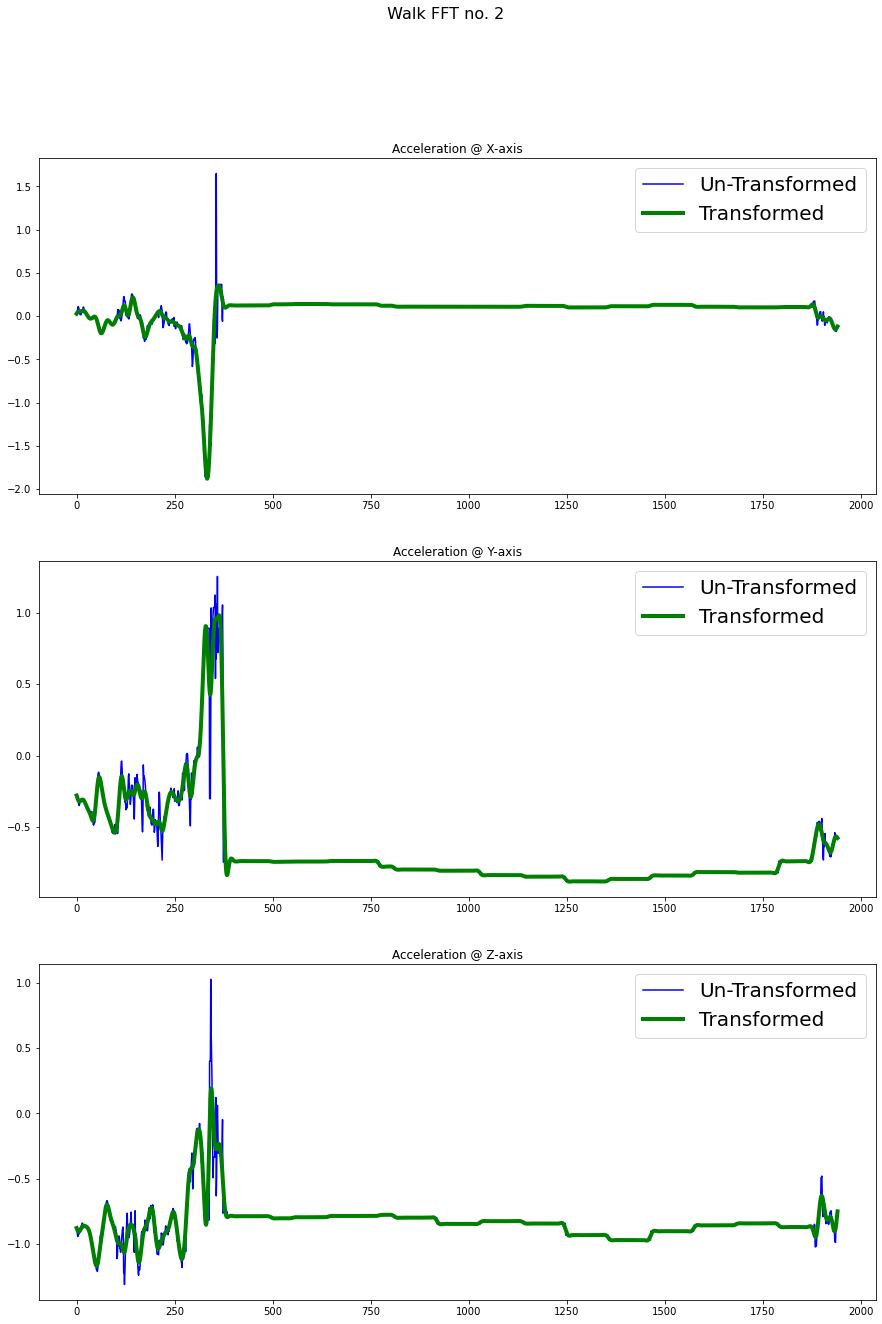

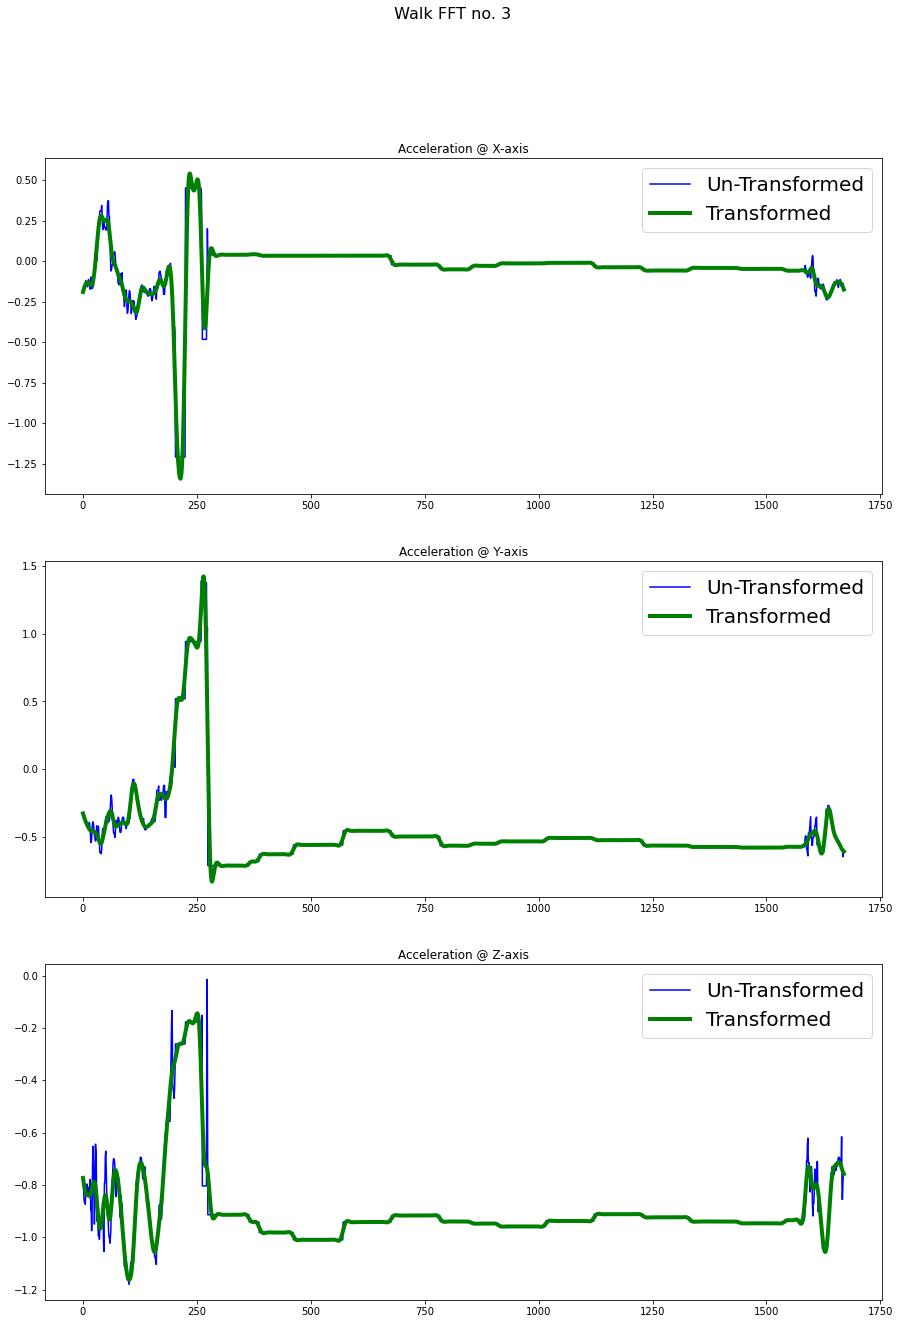

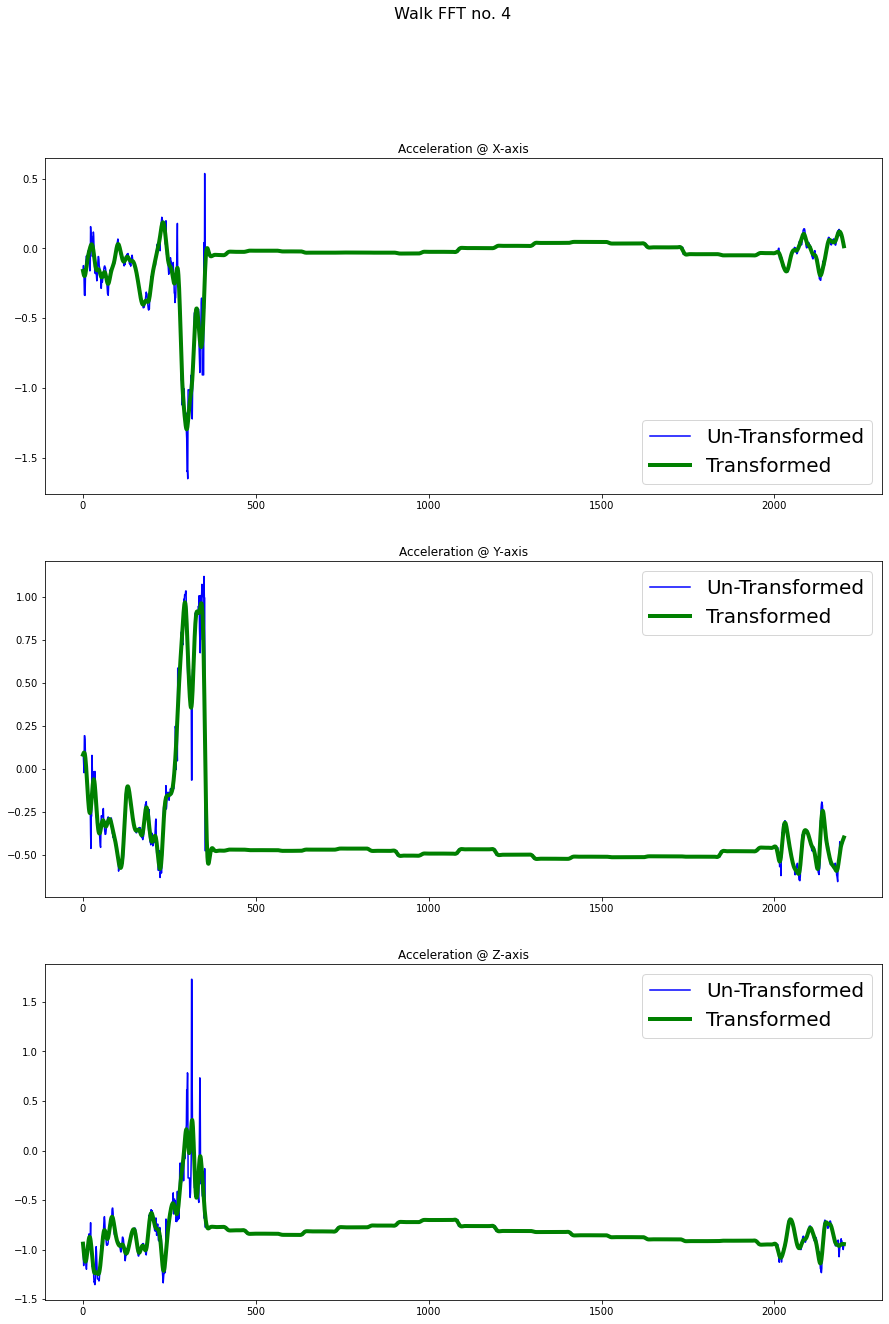

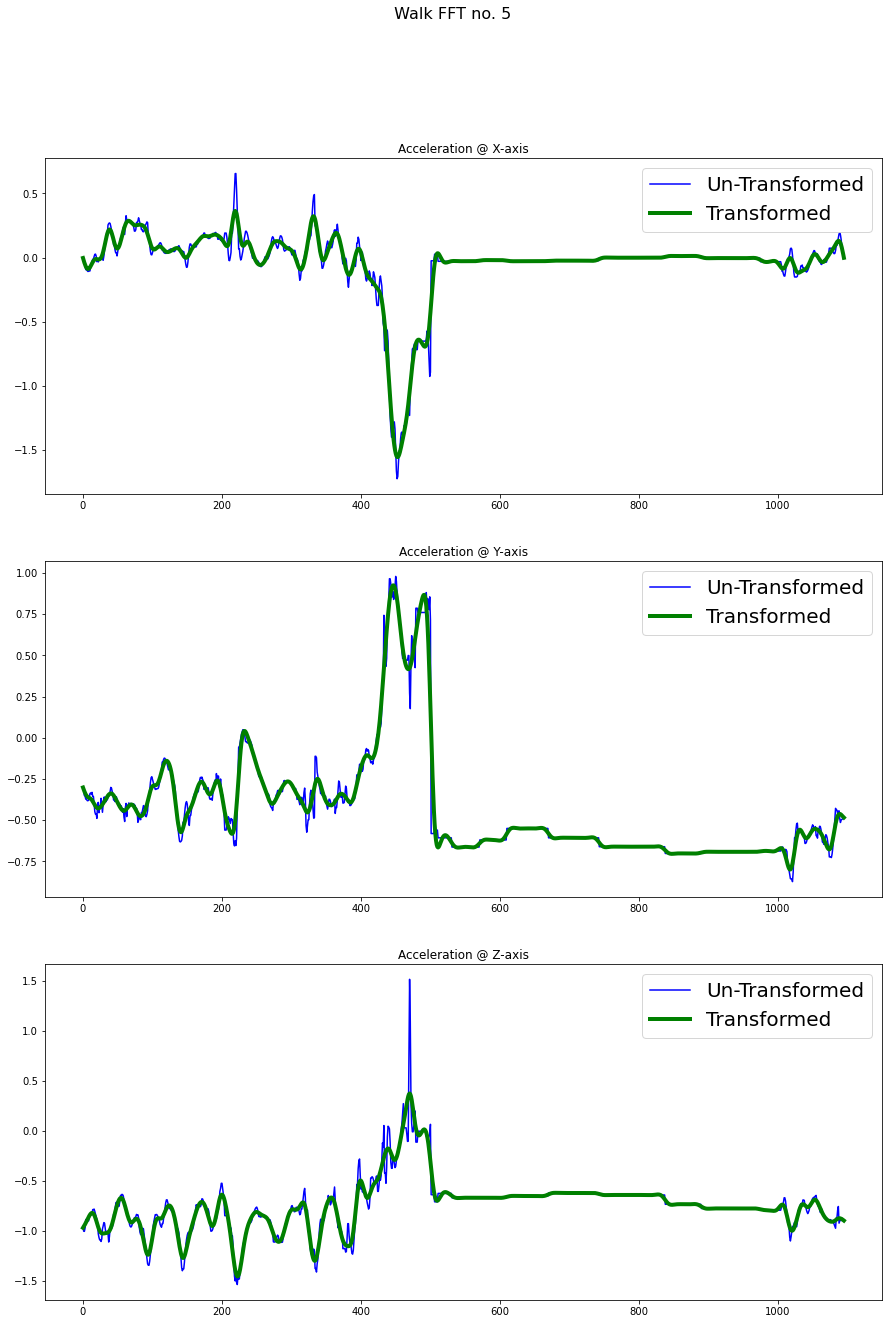

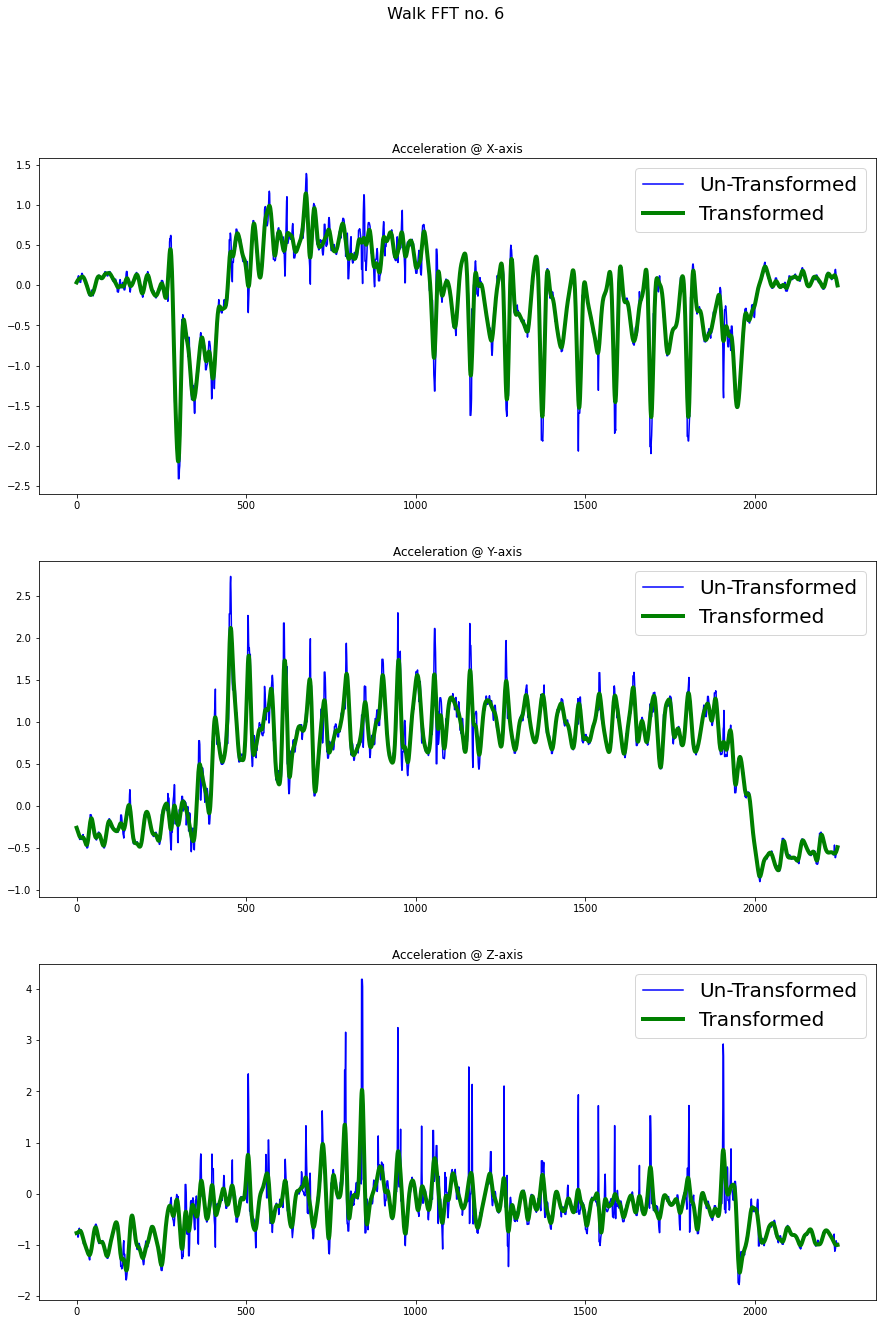

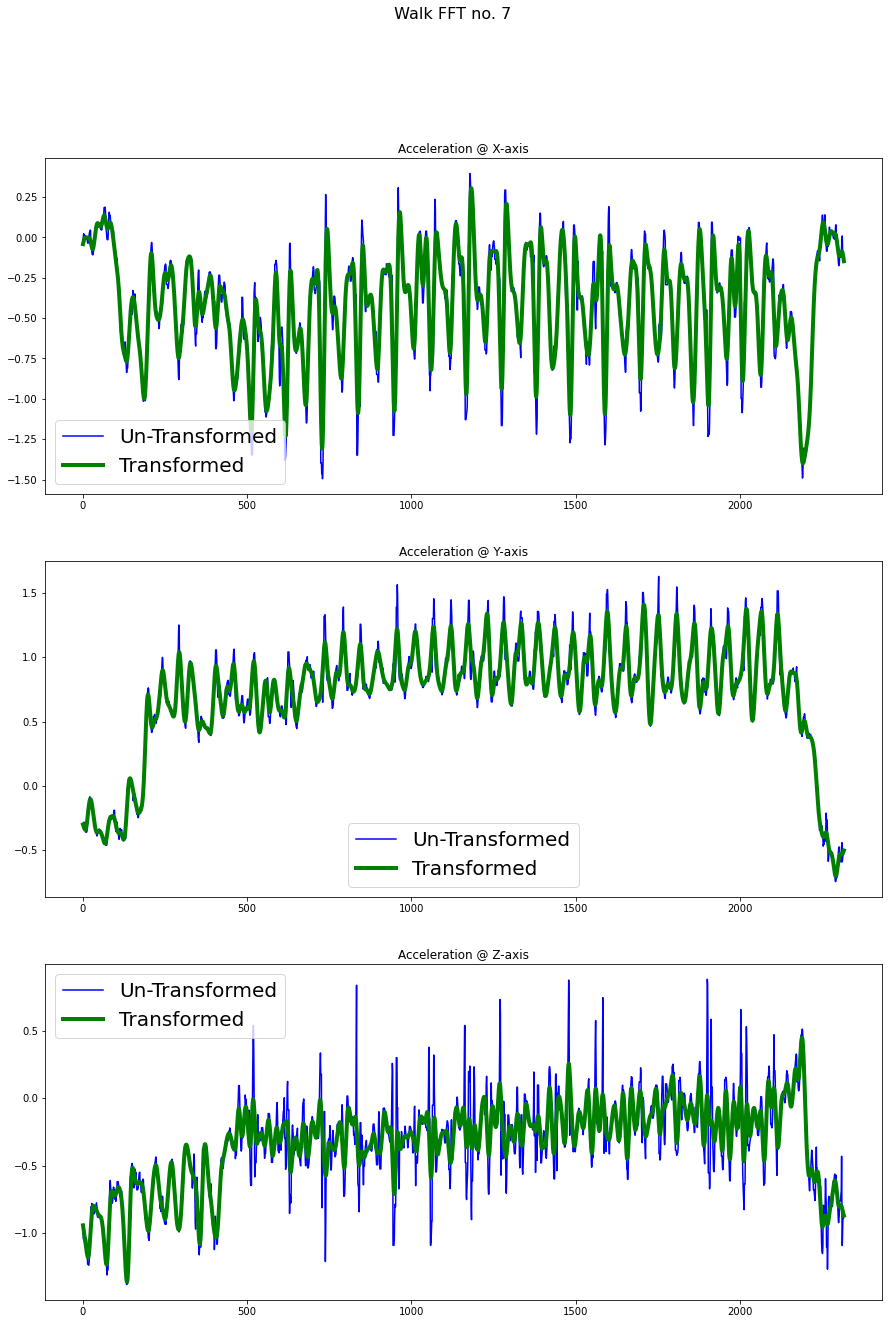

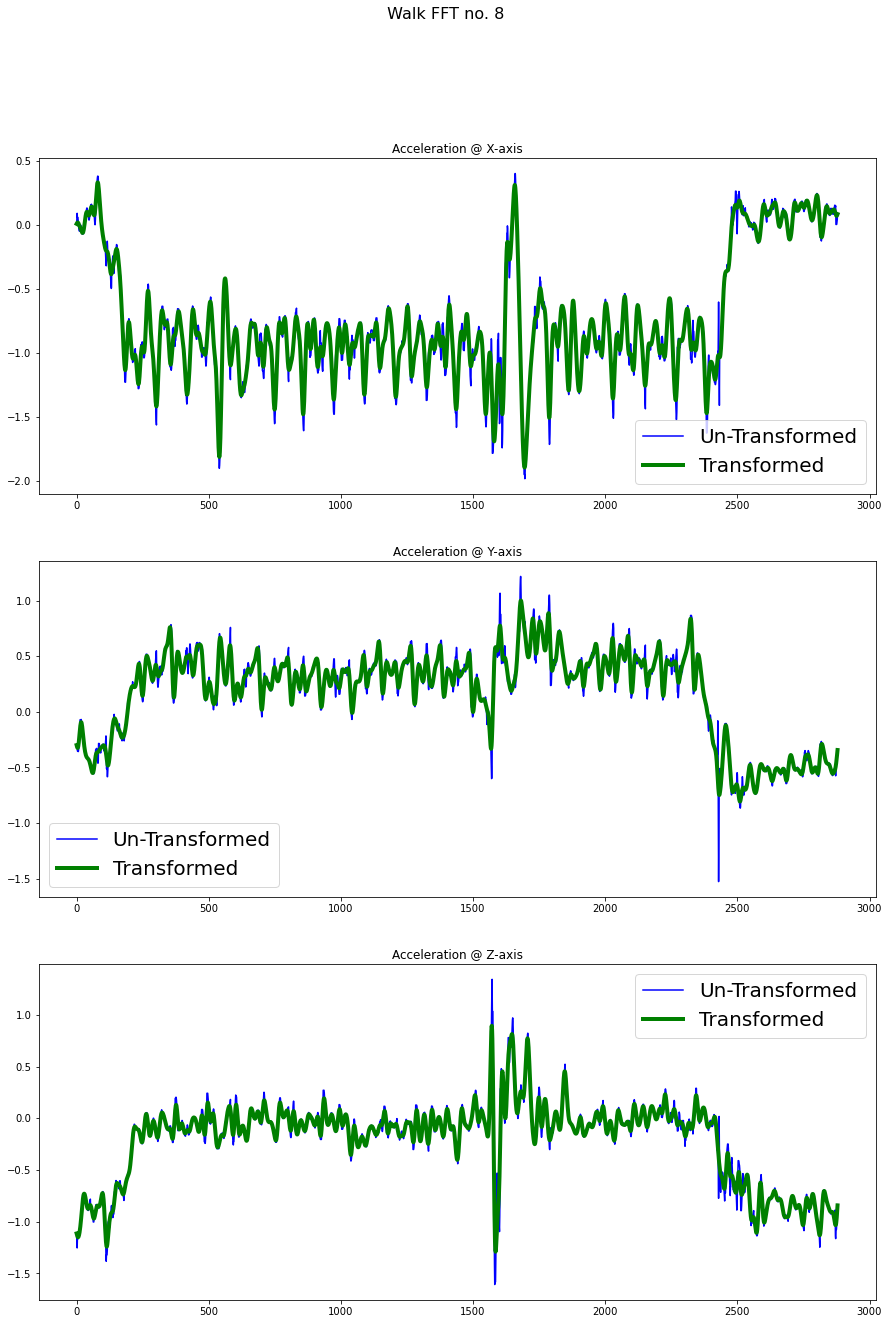

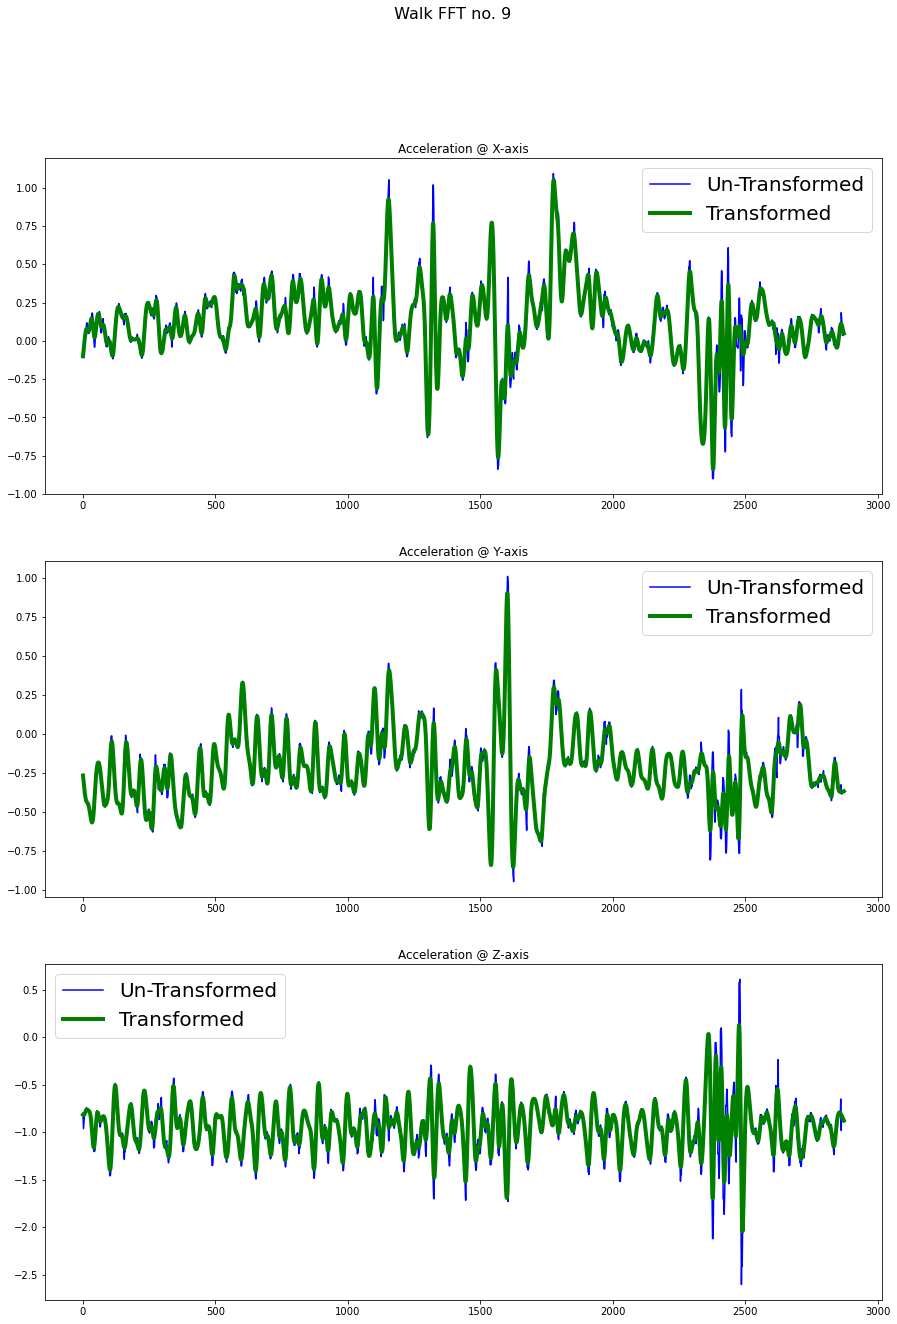

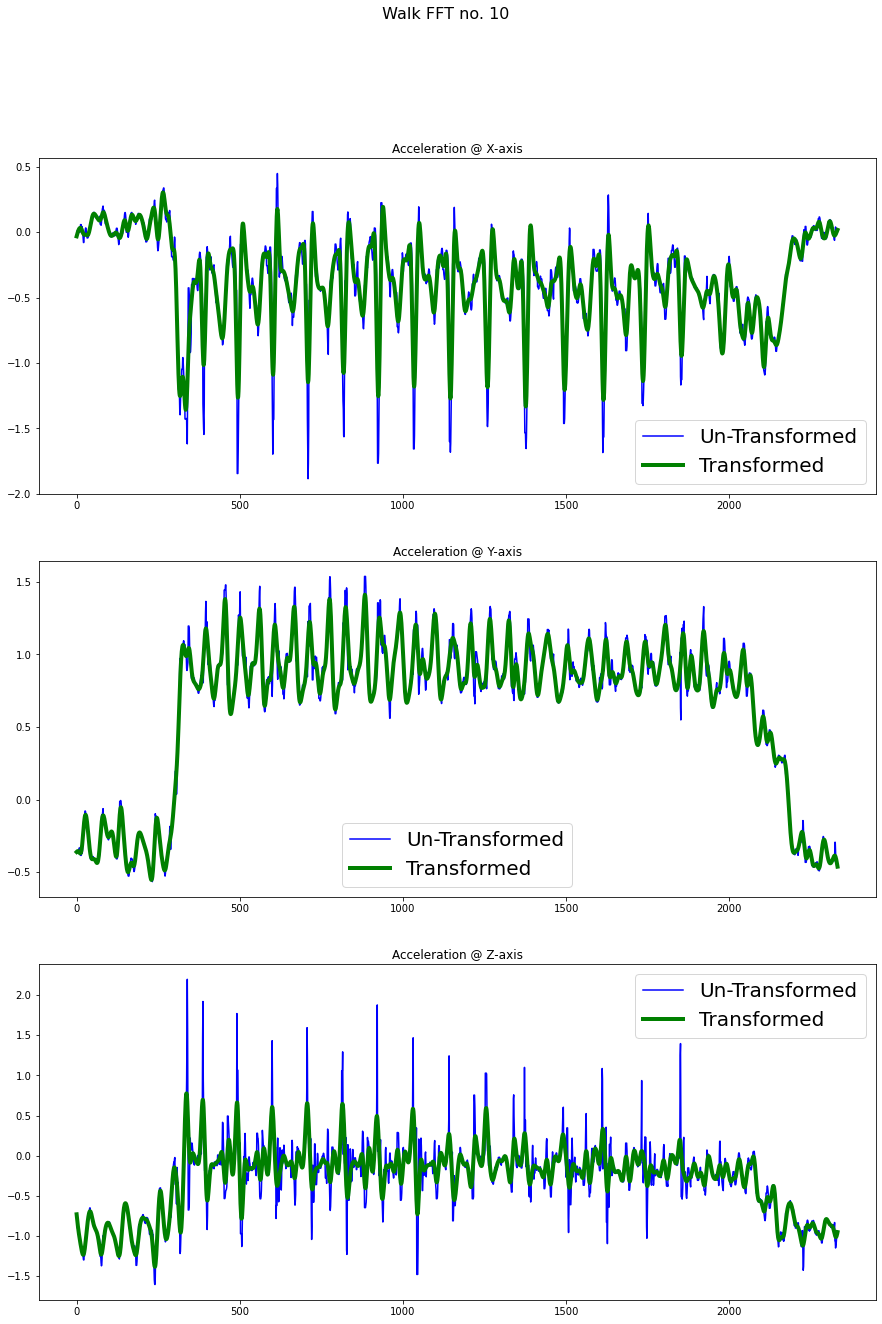

In [13]:
for i in range (10):
    fig, ax = plt.subplots(3,figsize=(15,21))
    
    fig.suptitle(' Walk FFT no. {}'.format(i+1), fontsize=16)
    
    ax[0].plot(walk_np[i]["gFx"],'blue',label='Un-Transformed')
    ax[0].plot(butter_worth_walk[i]["AccX"],'green', label='Transformed', linewidth=4.0)
    ax[0].legend(fontsize=20)
    ax[0].title.set_text('Acceleration @ X-axis')
    
    ax[1].plot(walk_np[i]["gFy"],'blue',label='Un-Transformed')
    ax[1].plot(butter_worth_walk[i]["AccY"],'green', label='Transformed', linewidth=4.0)
    ax[1].legend(fontsize=20)
    ax[1].title.set_text('Acceleration @ Y-axis')
    
    ax[2].plot(walk_np[i]["gFz"],'blue',label='Un-Transformed')
    ax[2].plot(butter_worth_walk[i]["AccZ"],'green', label='Transformed', linewidth=4.0)
    ax[2].legend(fontsize=20)
    ax[2].title.set_text('Acceleration @ Z-axis')
    
  
    
 

In [14]:
####Save the  walking transformed/cleaned data over here

for i in range(10):
    butter_worth_walk[i].to_csv("cleaned/walk{}.csv".format(i+1), sep = ';',index=False)

In [15]:
#### standing Data cleaning starts here

In [16]:
butter_worth_standing = []
for i in range(10):
    butter_worth_standingX = signal.filtfilt(b, a, standing_np[i]["gFx"])
    butter_worth_standingY = signal.filtfilt(b, a, standing_np[i]["gFy"])
    butter_worth_standingZ = signal.filtfilt(b, a, standing_np[i]["gFz"])
    #butter_worth_walk_L =signal.filtfilt(b, a,walk_np[i]["acc"])
    
    
    butter_worth_standing.append((pd.DataFrame(list(zip(standing_np[i]['time'],butter_worth_standingX, butter_worth_standingY, butter_worth_standingZ,standing_np[i]['acc'])),
                                            columns=["Time","AccX", "AccY", "AccZ","Acc-old"])))
    
    
    
    

In [17]:
for i in range(10):
    butter_worth_standing[i]["Acc-trns"] = np.sqrt(butter_worth_standing[i]["AccX"]**2 * 
                                                     butter_worth_standing[i]["AccY"]**2 *
                                                     butter_worth_standing[i]["AccZ"]**2 ) 
    
butter_worth_standing[0]

Time      AccX      AccY      AccZ  Acc-old  Acc-trns
0     56:10.0  0.024733 -0.418209 -0.853952    0.951  0.008833
1     56:10.0  0.023744 -0.419375 -0.871900    0.956  0.008682
2     56:10.0  0.022700 -0.420530 -0.889025    1.011  0.008487
3     56:10.1  0.021531 -0.421664 -0.904523    1.043  0.008212
4     56:10.1  0.020190 -0.422769 -0.917745    1.051  0.007834
...       ...       ...       ...       ...      ...       ...
1735  56:27.3  0.000684 -0.402660 -0.915092    1.006  0.000252
1736  56:27.3  0.002159 -0.401412 -0.917986    1.006  0.000796
1737  56:27.3  0.003666 -0.400154 -0.920879    1.008  0.001351
1738  56:27.3  0.005179 -0.398919 -0.923682    1.010  0.001908
1739  56:27.3  0.006661 -0.397731 -0.926334    1.008  0.002454

[1740 rows x 6 columns]

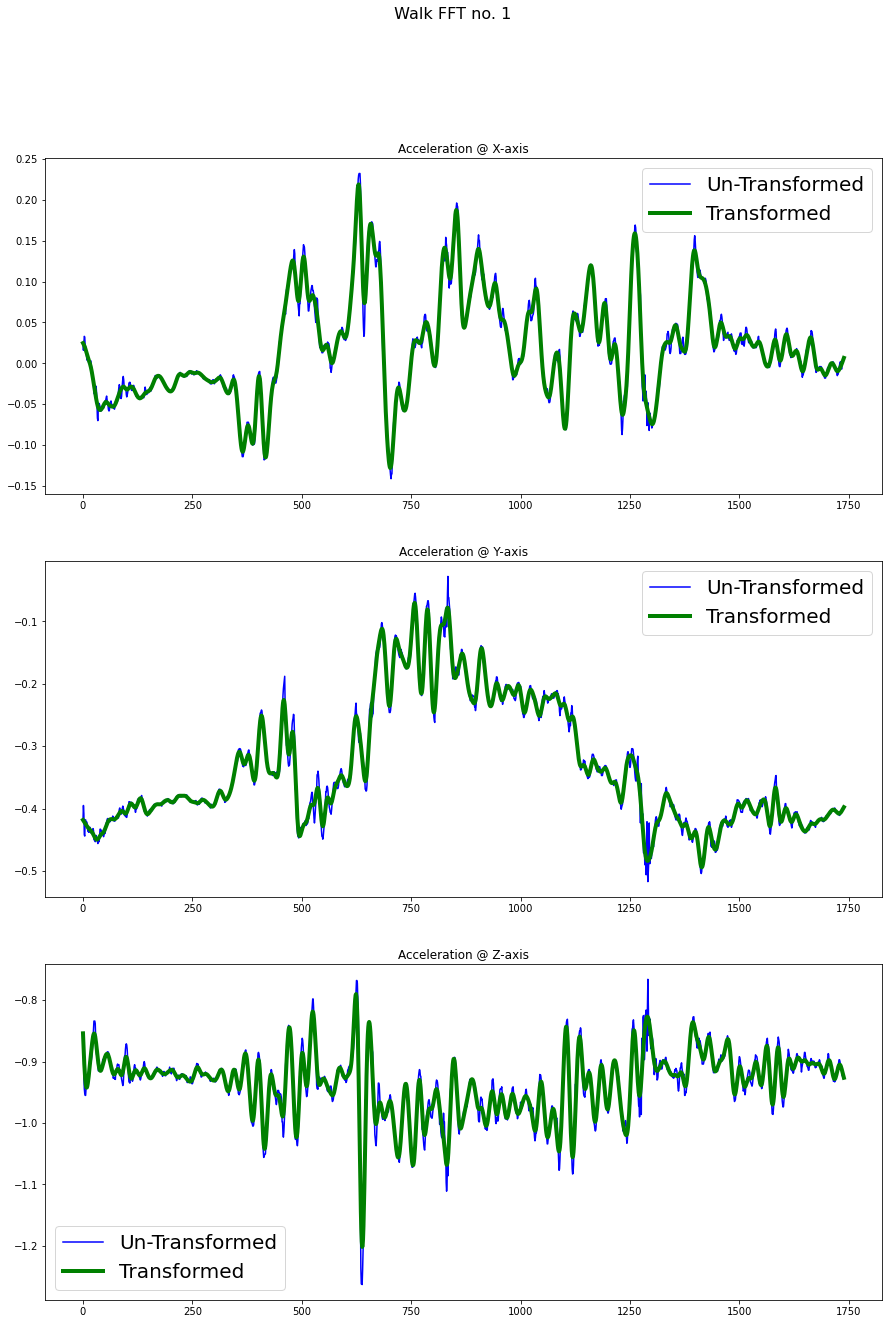

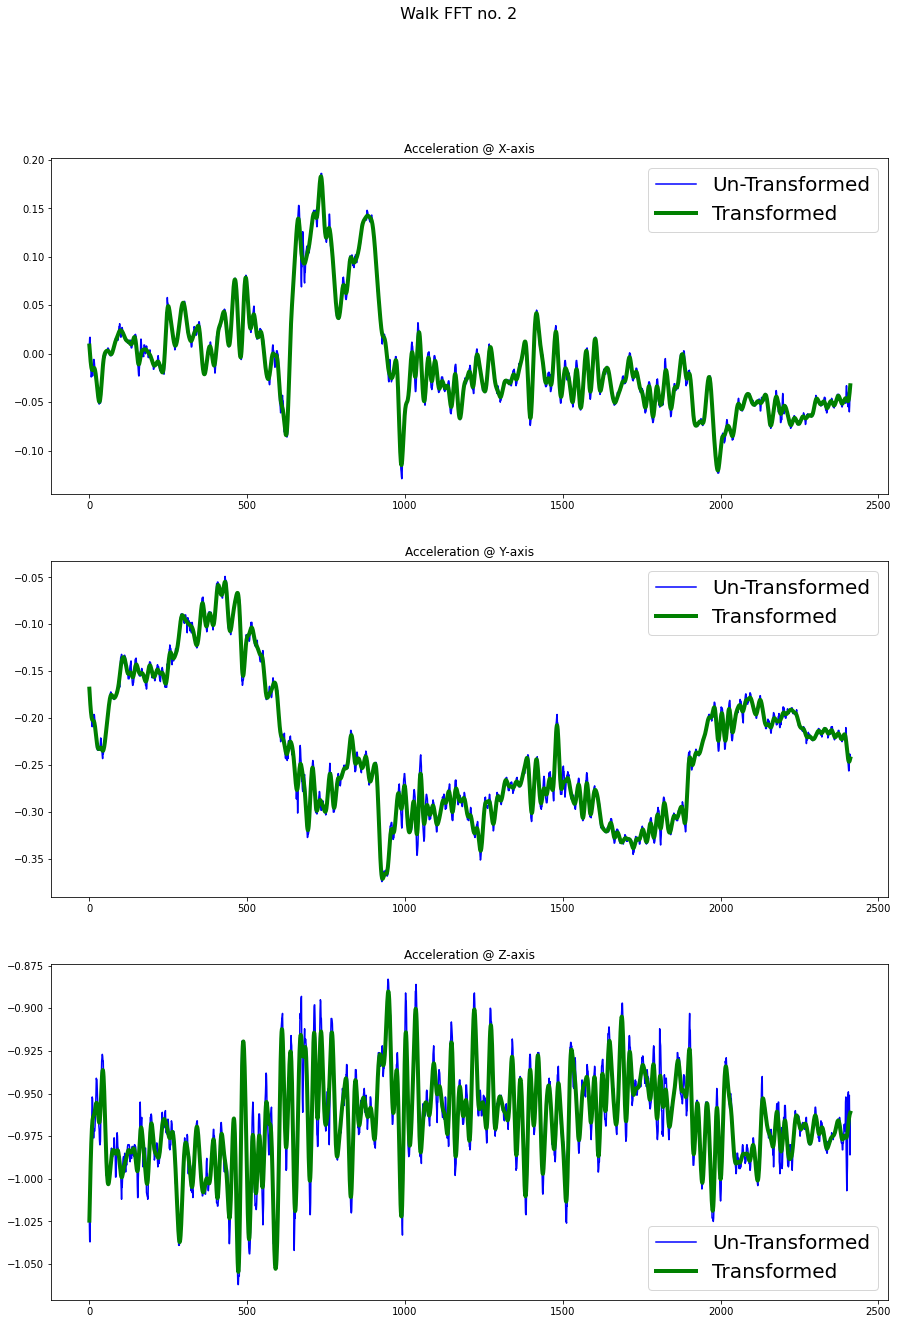

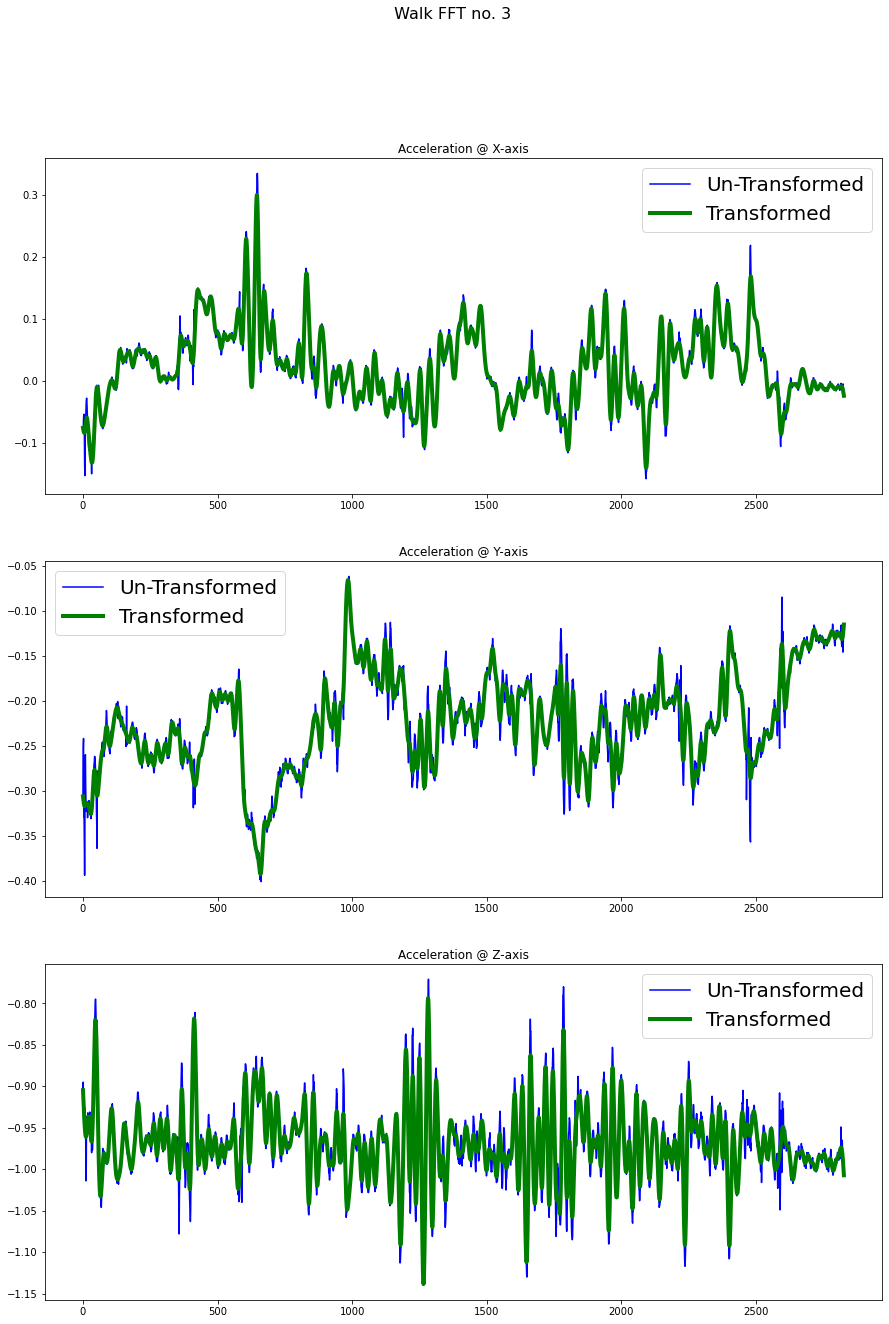

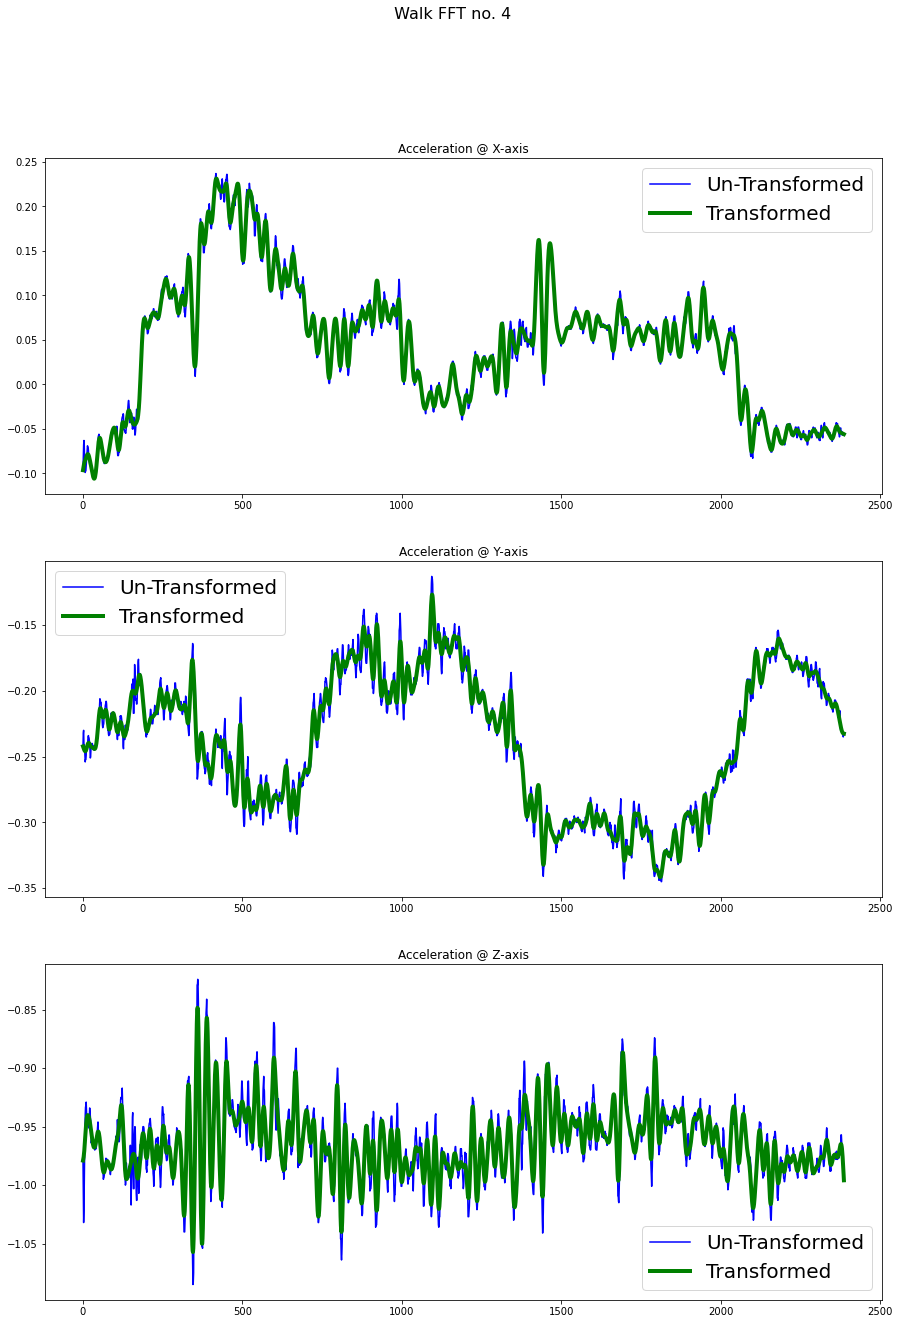

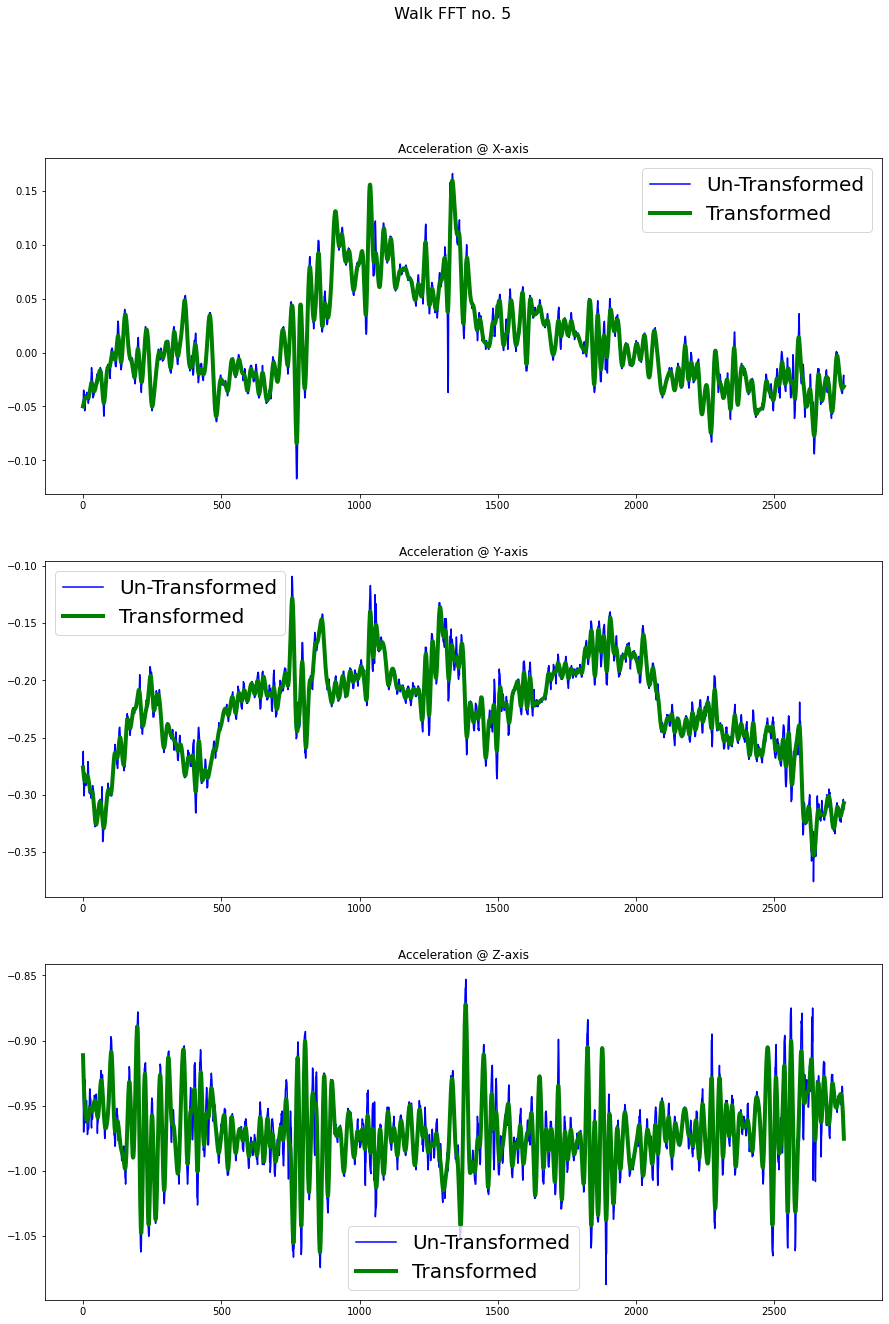

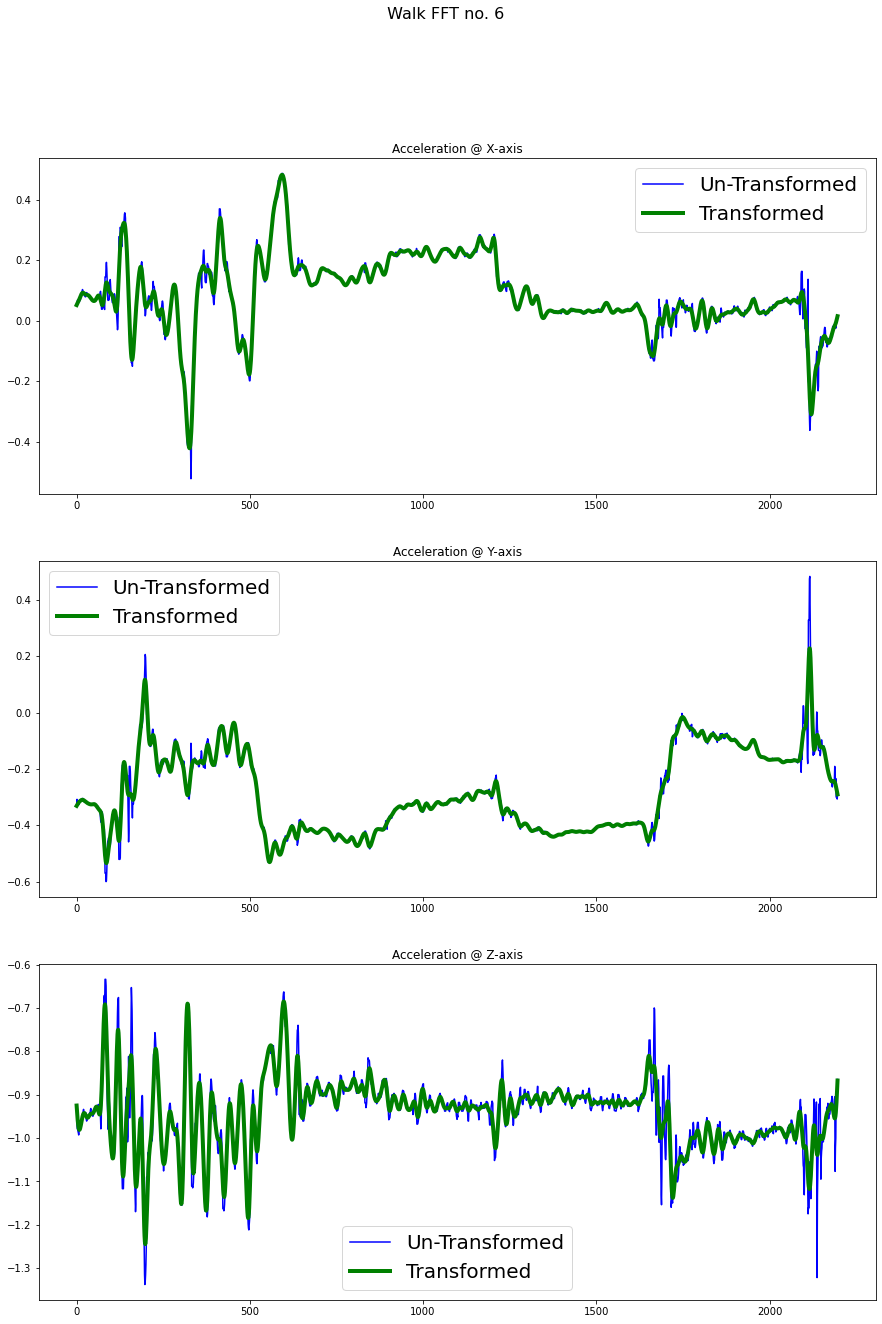

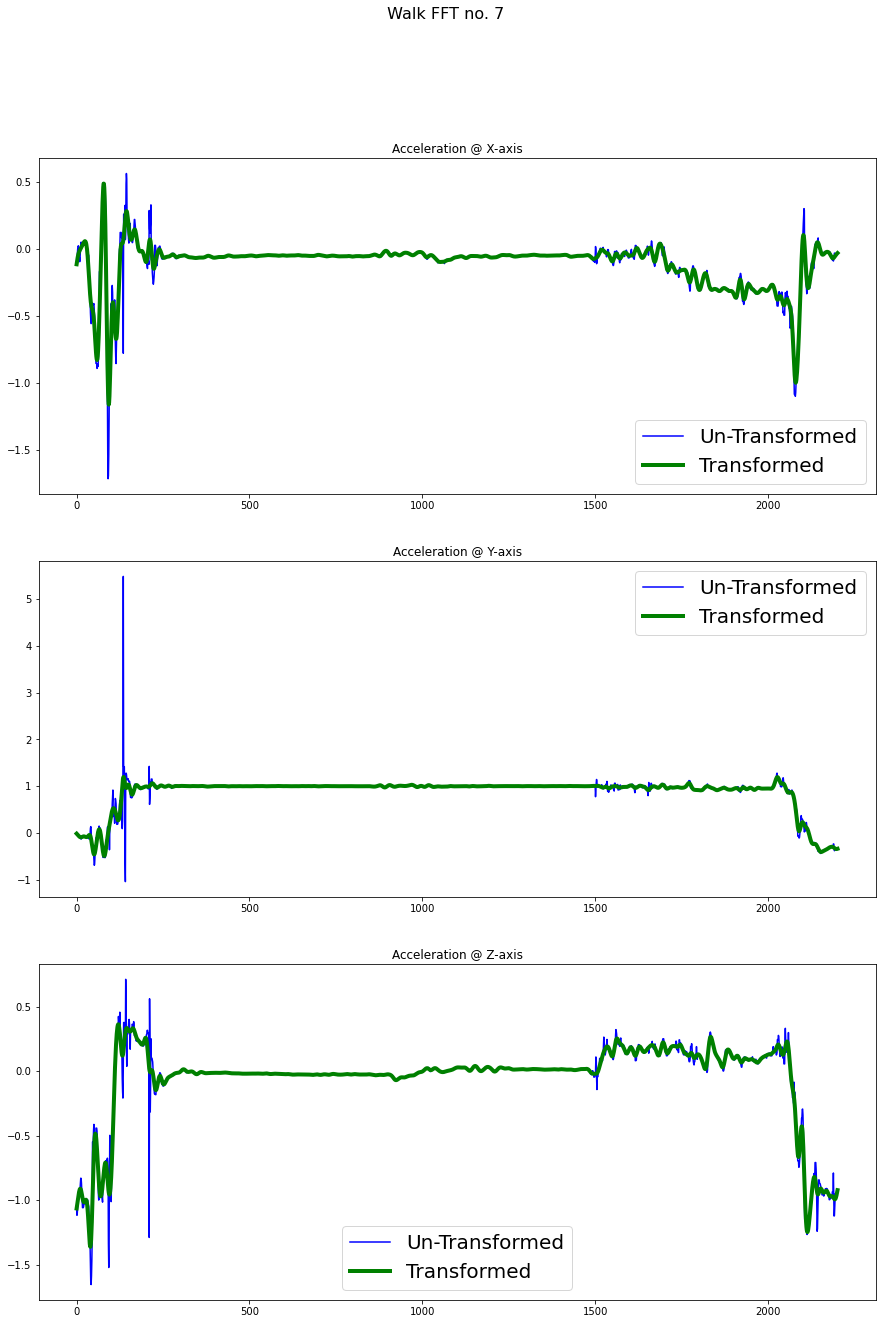

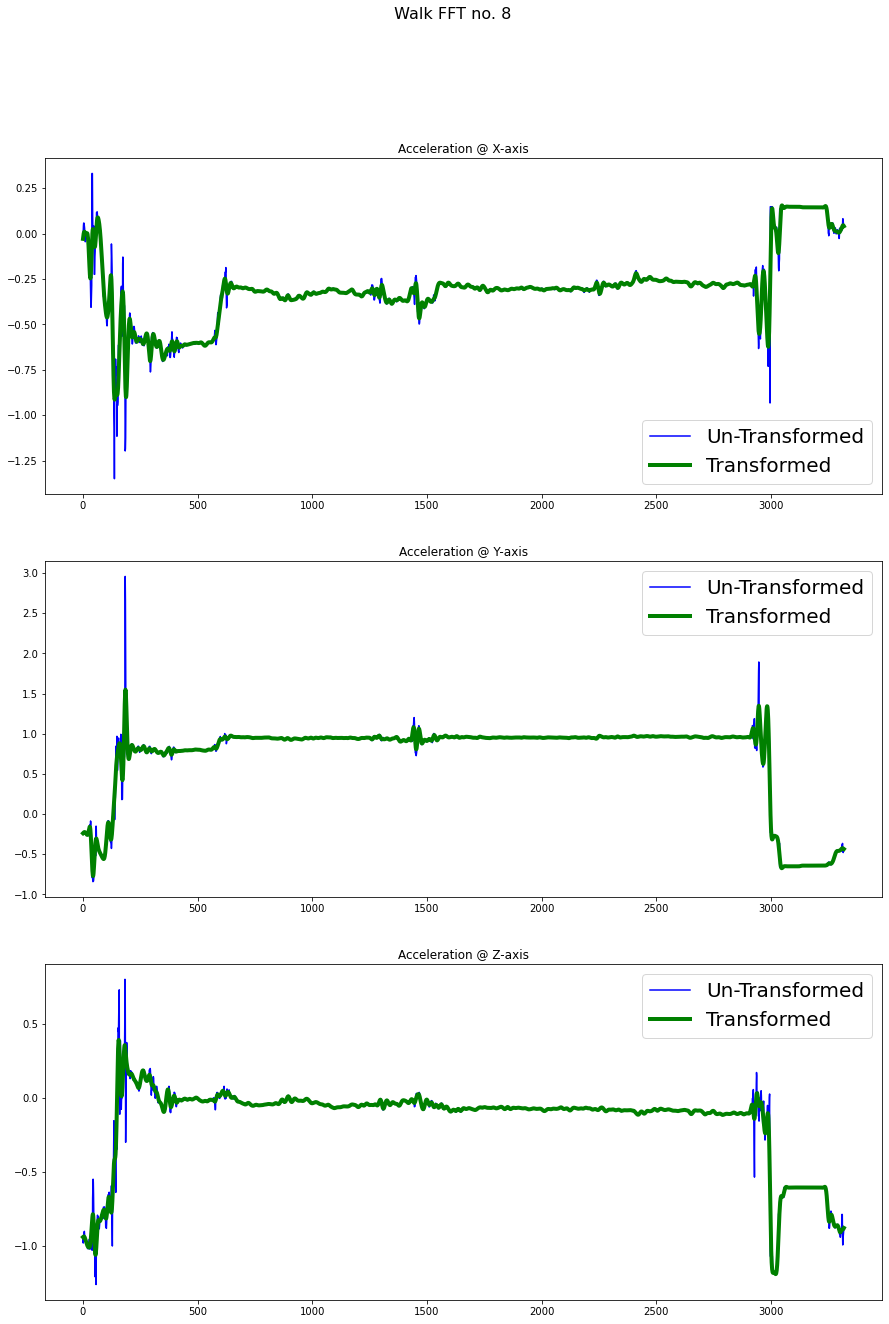

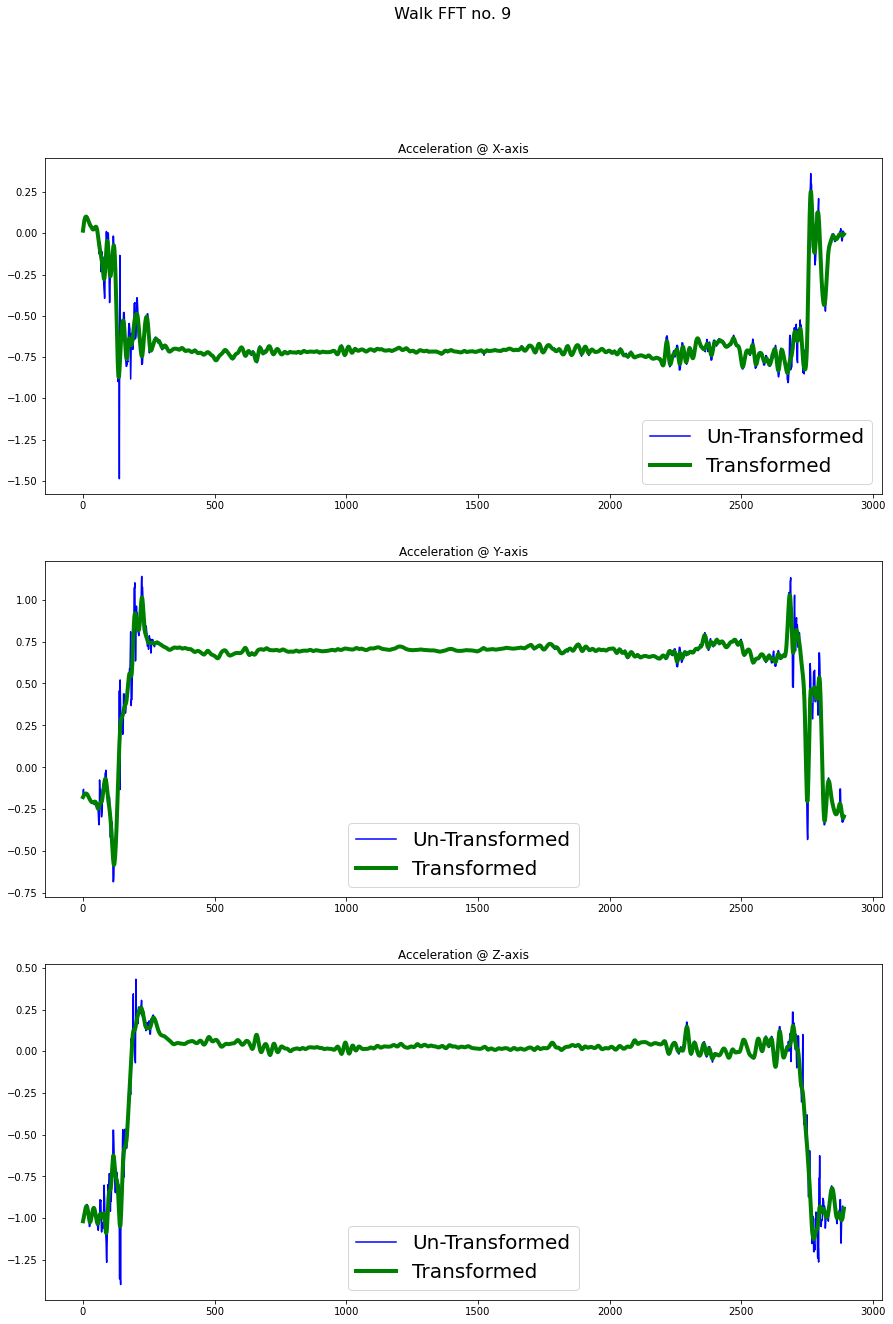

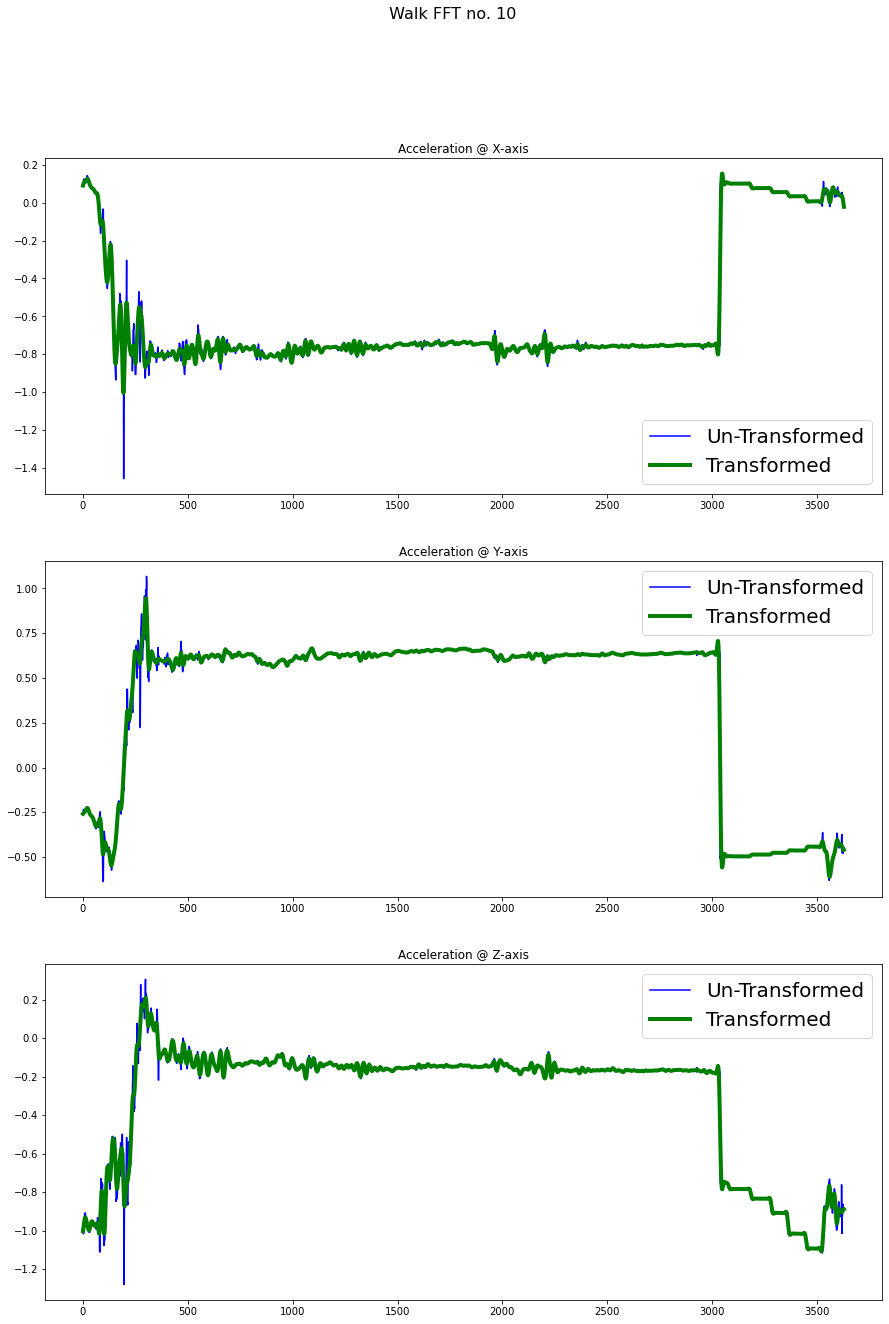

In [18]:
#####Transformations for Standing

for i in range (10):
    fig, ax = plt.subplots(3,figsize=(15,21))
    
    fig.suptitle(' Walk FFT no. {}'.format(i+1), fontsize=16)
    
    ax[0].plot(standing_np[i]["gFx"],'blue',label='Un-Transformed')
    ax[0].plot(butter_worth_standing[i]["AccX"],'green', label='Transformed', linewidth=4.0)
    ax[0].legend(fontsize=20)
    ax[0].title.set_text('Acceleration @ X-axis')
    
    ax[1].plot(standing_np[i]["gFy"],'blue',label='Un-Transformed')
    ax[1].plot(butter_worth_standing[i]["AccY"],'green', label='Transformed', linewidth=4.0)
    ax[1].legend(fontsize=20)
    ax[1].title.set_text('Acceleration @ Y-axis')
    
    ax[2].plot(standing_np[i]["gFz"],'blue',label='Un-Transformed')
    ax[2].plot(butter_worth_standing[i]["AccZ"],'green', label='Transformed', linewidth=4.0)
    ax[2].legend(fontsize=20)
    ax[2].title.set_text('Acceleration @ Z-axis')
    

In [19]:
########Save the standing Cleaned/Transformed data here ######
for i in range(10):
    butter_worth_standing[i].to_csv("cleaned/standing{}.csv".format(i+1), sep = ';',index=False)

In [20]:
#### Running Data cleaning starts here


butter_worth_running = []
for i in range(10):
    butter_worth_runningX = signal.filtfilt(b, a, running_np[i]["gFx"])
    butter_worth_runningY = signal.filtfilt(b, a, running_np[i]["gFy"])
    butter_worth_runningZ = signal.filtfilt(b, a, running_np[i]["gFz"])
    #butter_worth_walk_L =signal.filtfilt(b, a,walk_np[i]["acc"])
    
    
    butter_worth_running.append((pd.DataFrame(list(zip(running_np[i]['time'],butter_worth_runningX, butter_worth_runningY, butter_worth_runningZ,running_np[i]['acc'])),
                                            columns=["Time","AccX", "AccY", "AccZ","Acc-old"])))
    


In [21]:
for i in range(10):
    butter_worth_running[i]["Acc-trns"] = np.sqrt(butter_worth_running[i]["AccX"]**2 * 
                                                     butter_worth_running[i]["AccY"]**2 *
                                                     butter_worth_running[i]["AccZ"]**2 ) 
    


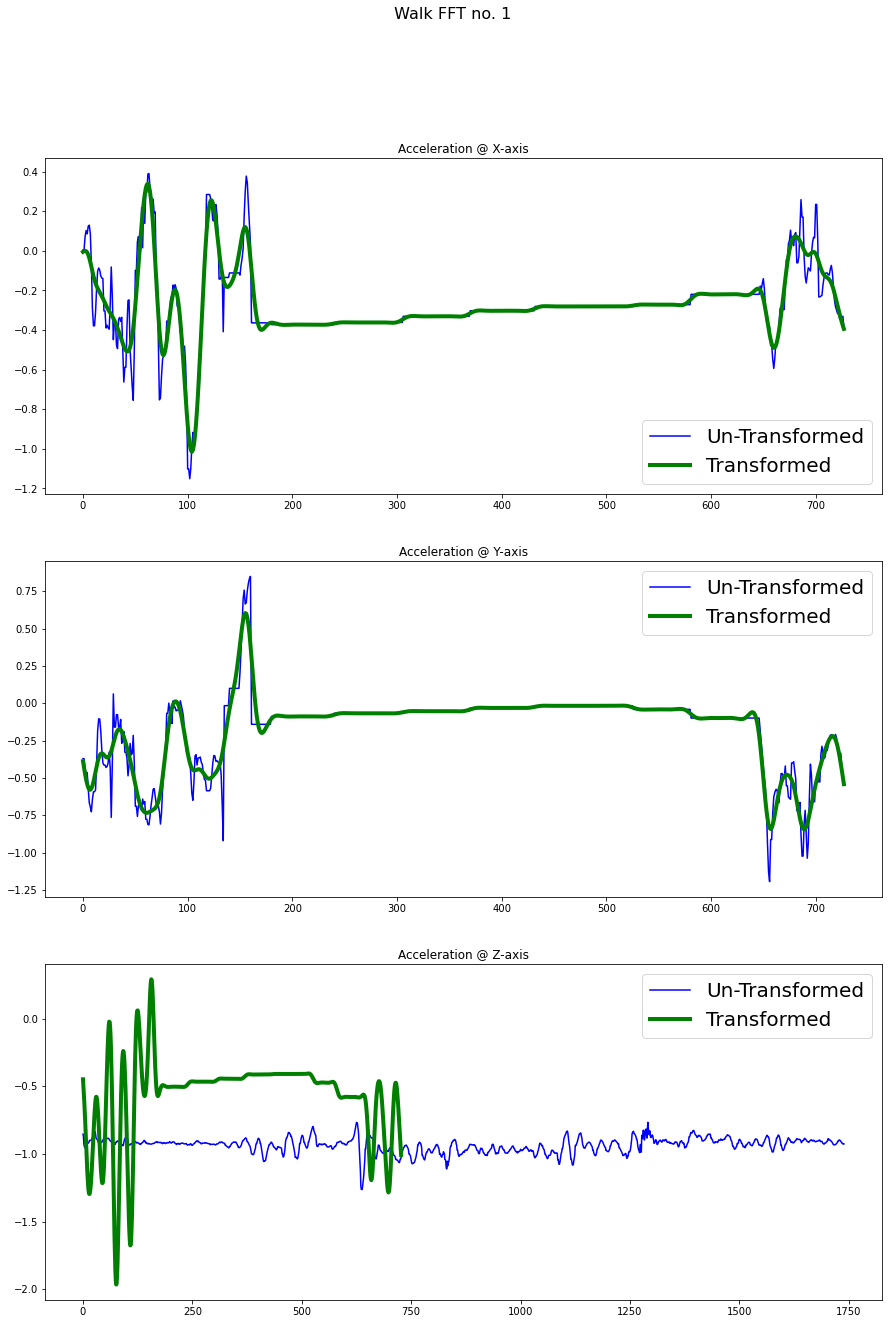

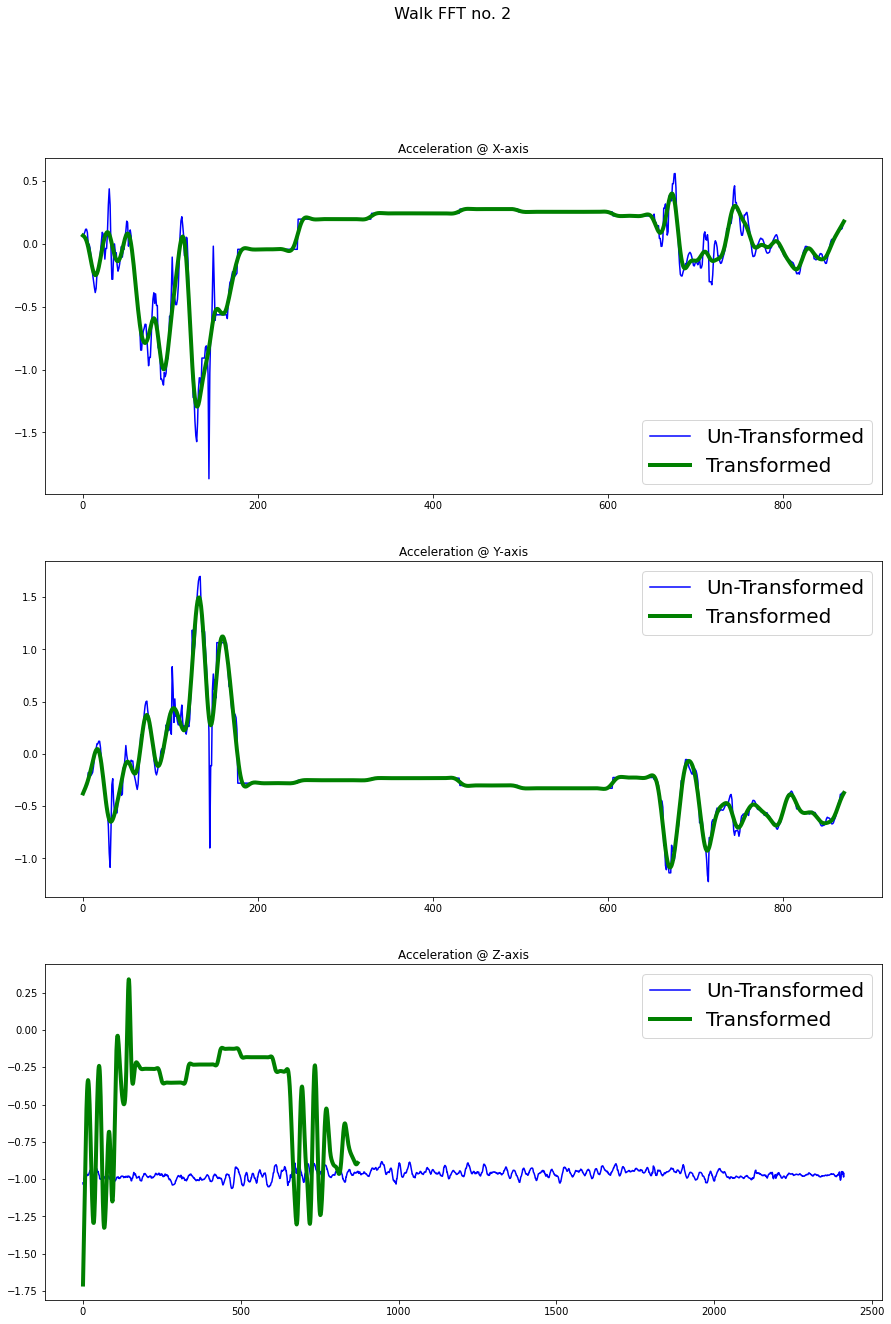

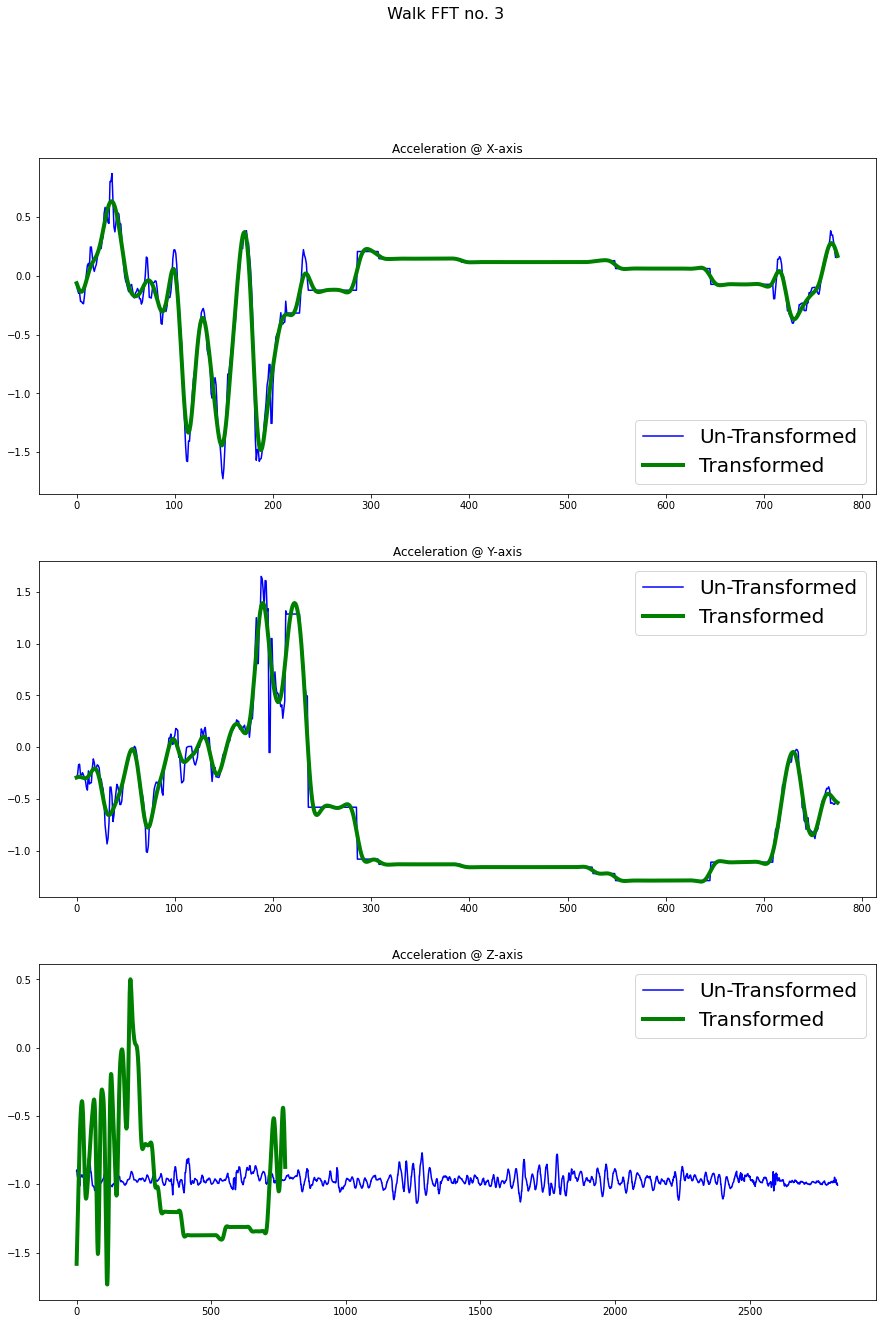

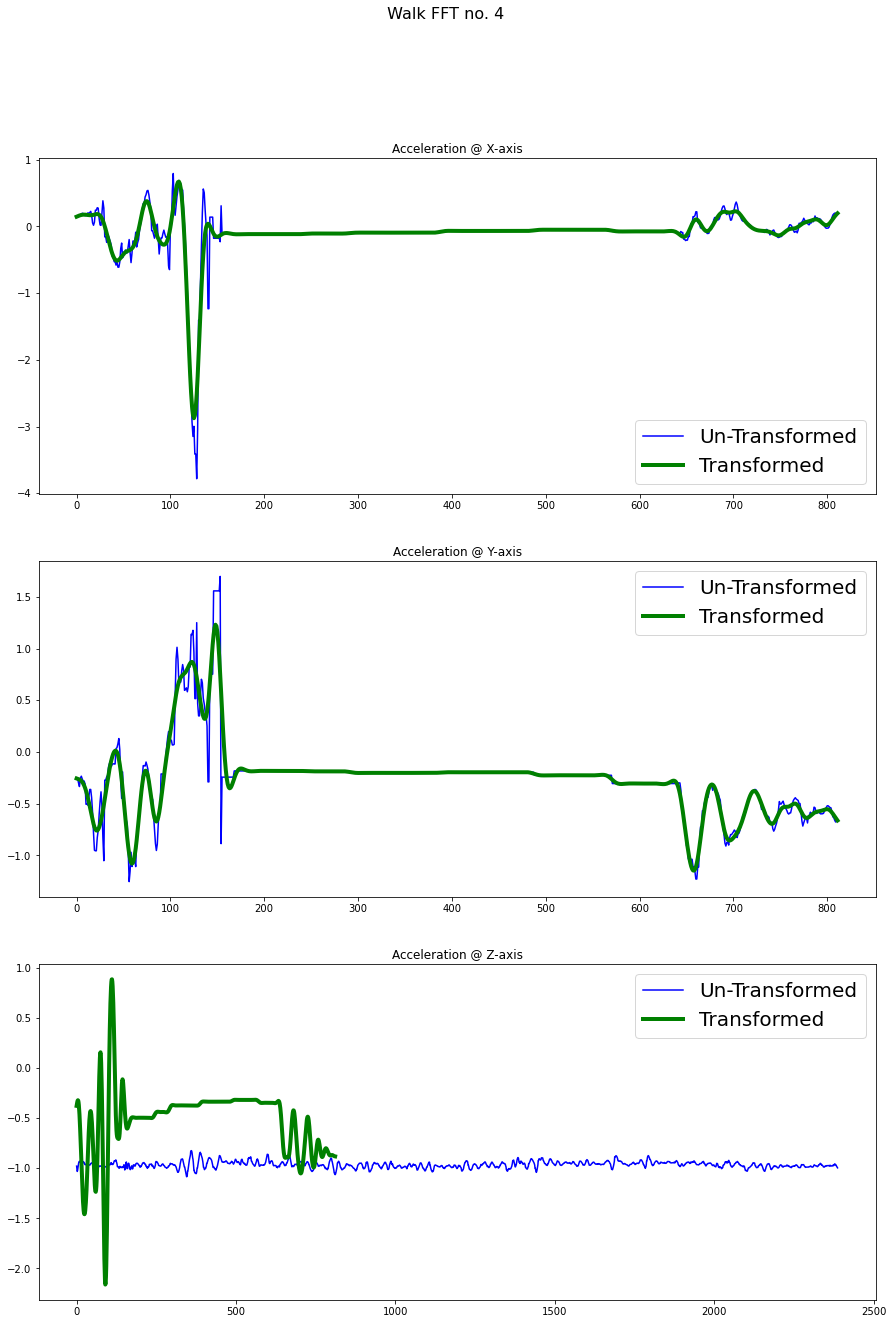

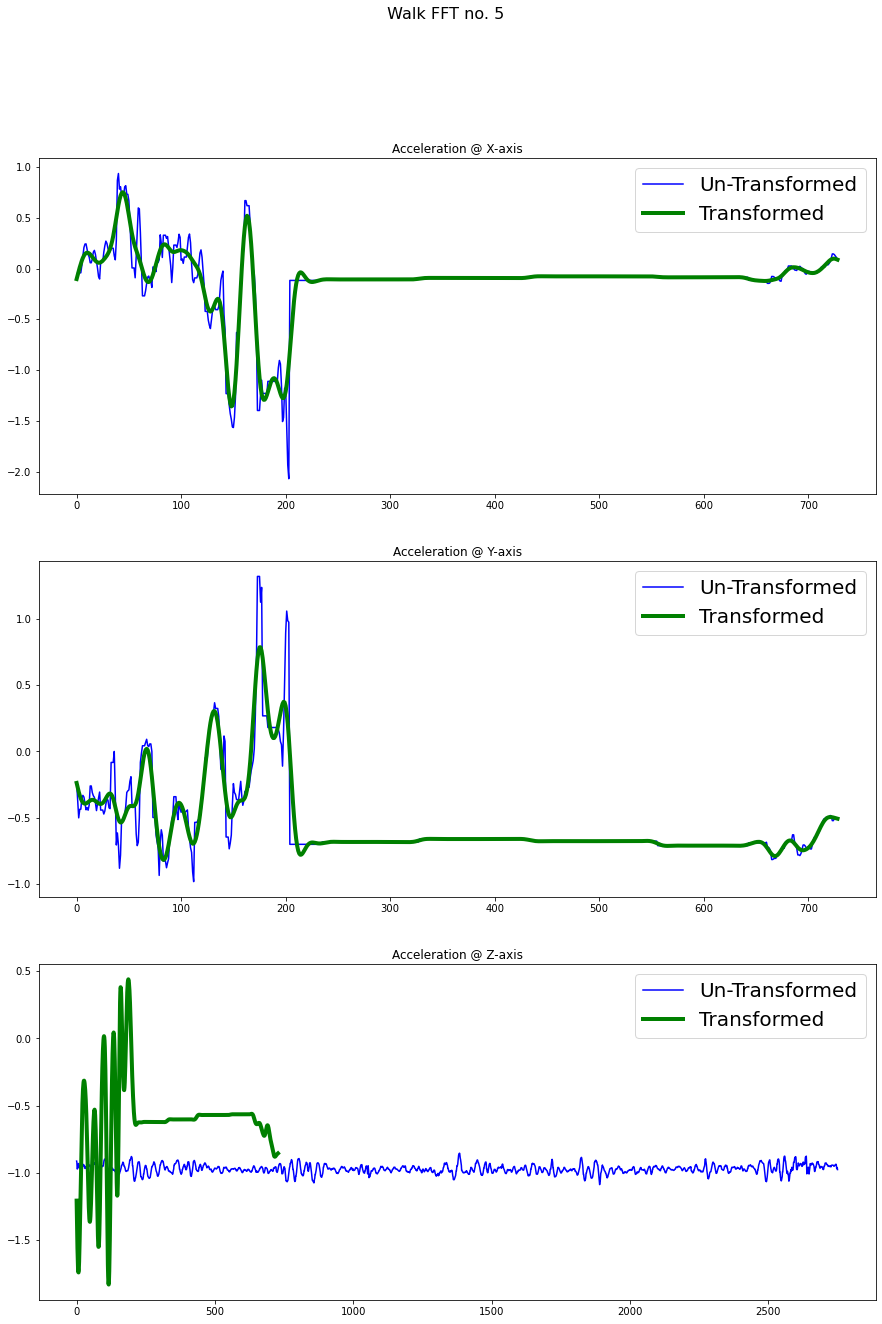

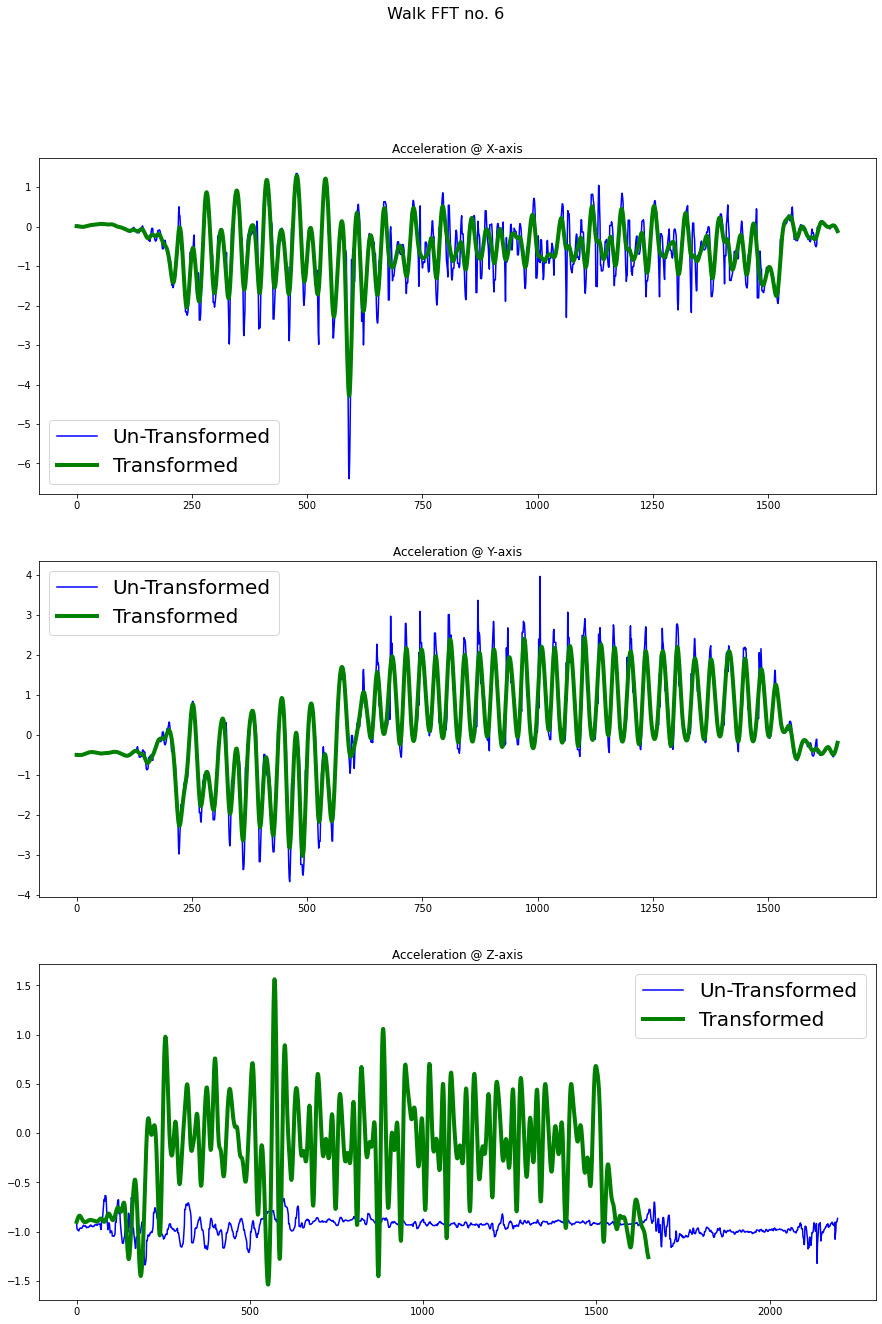

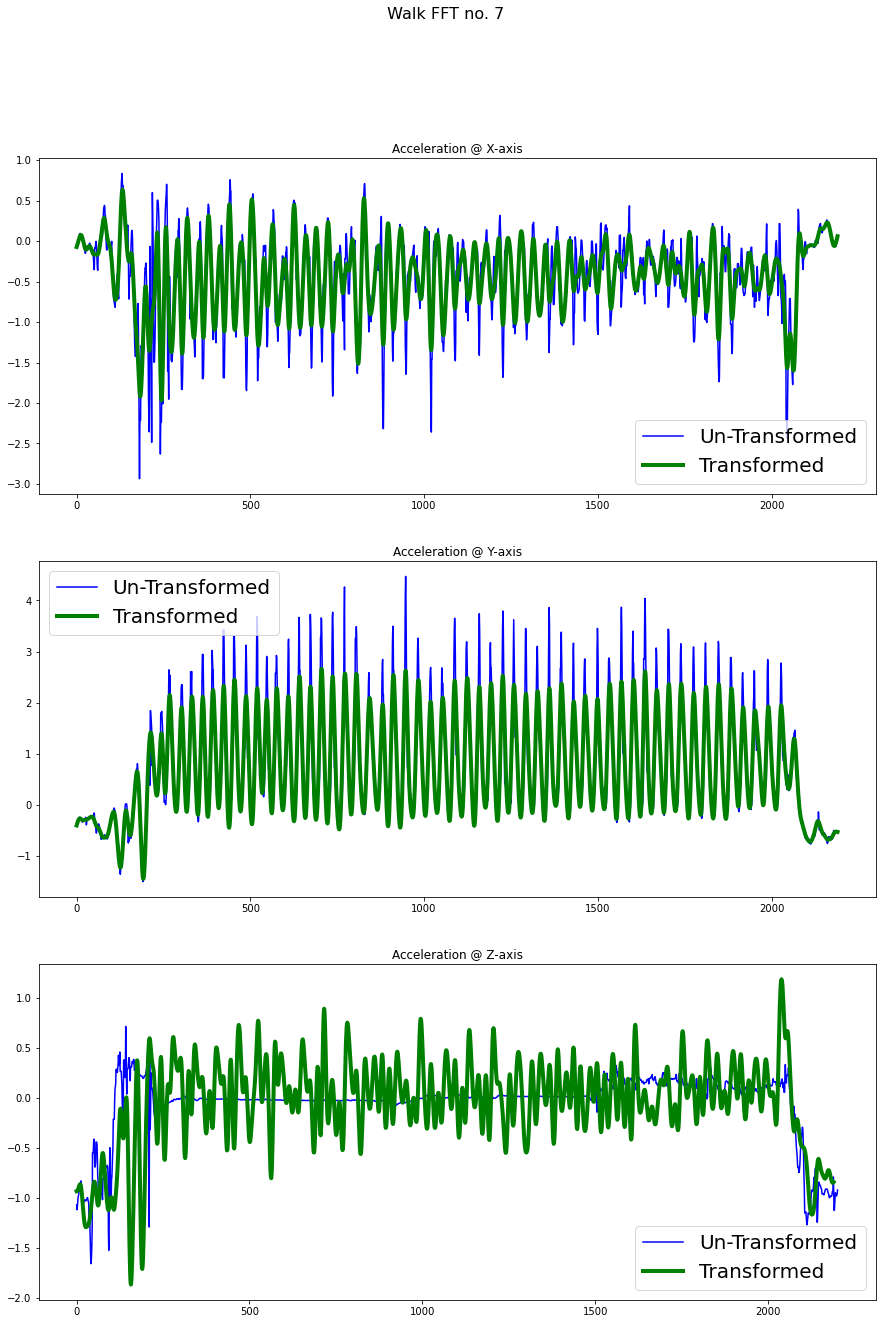

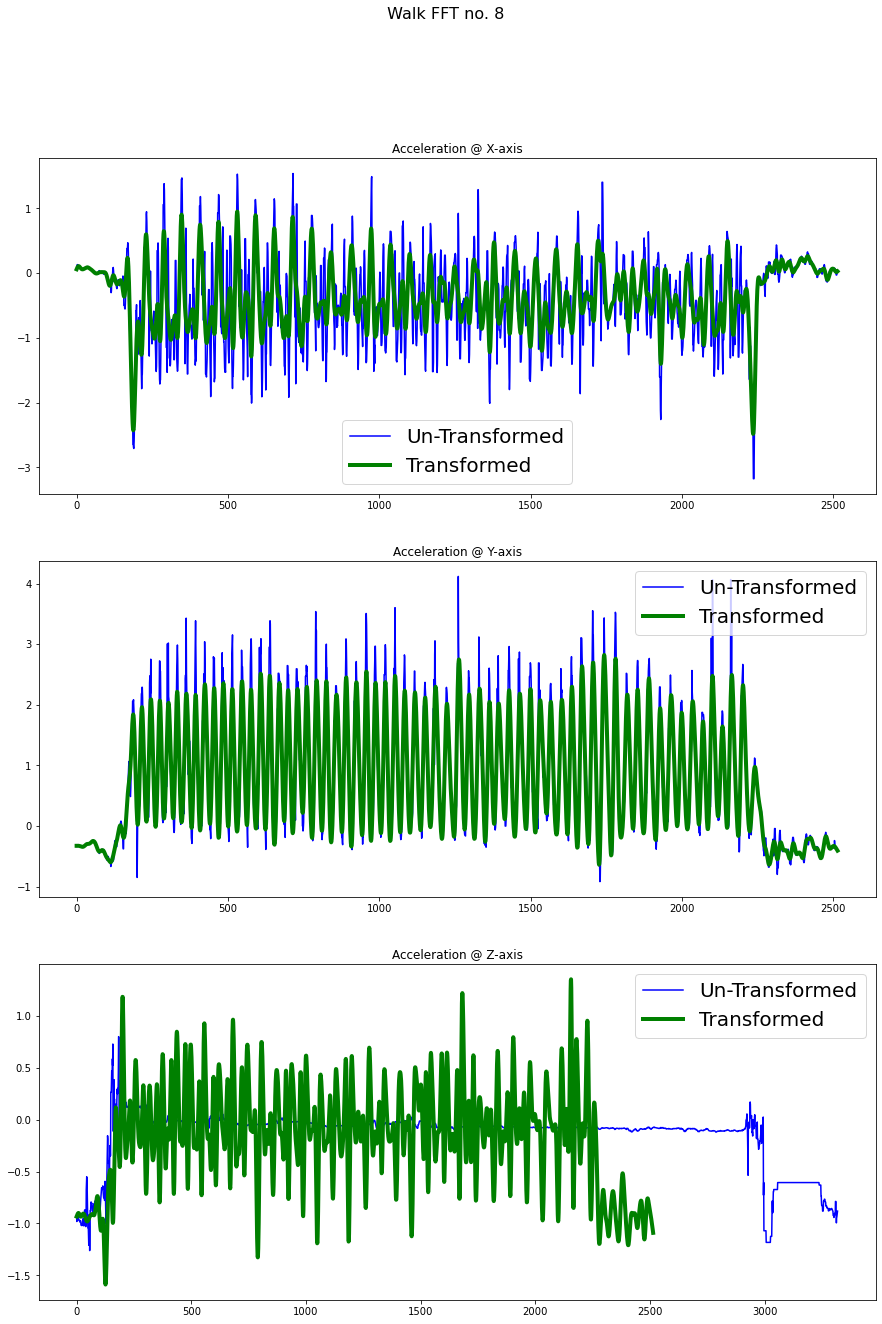

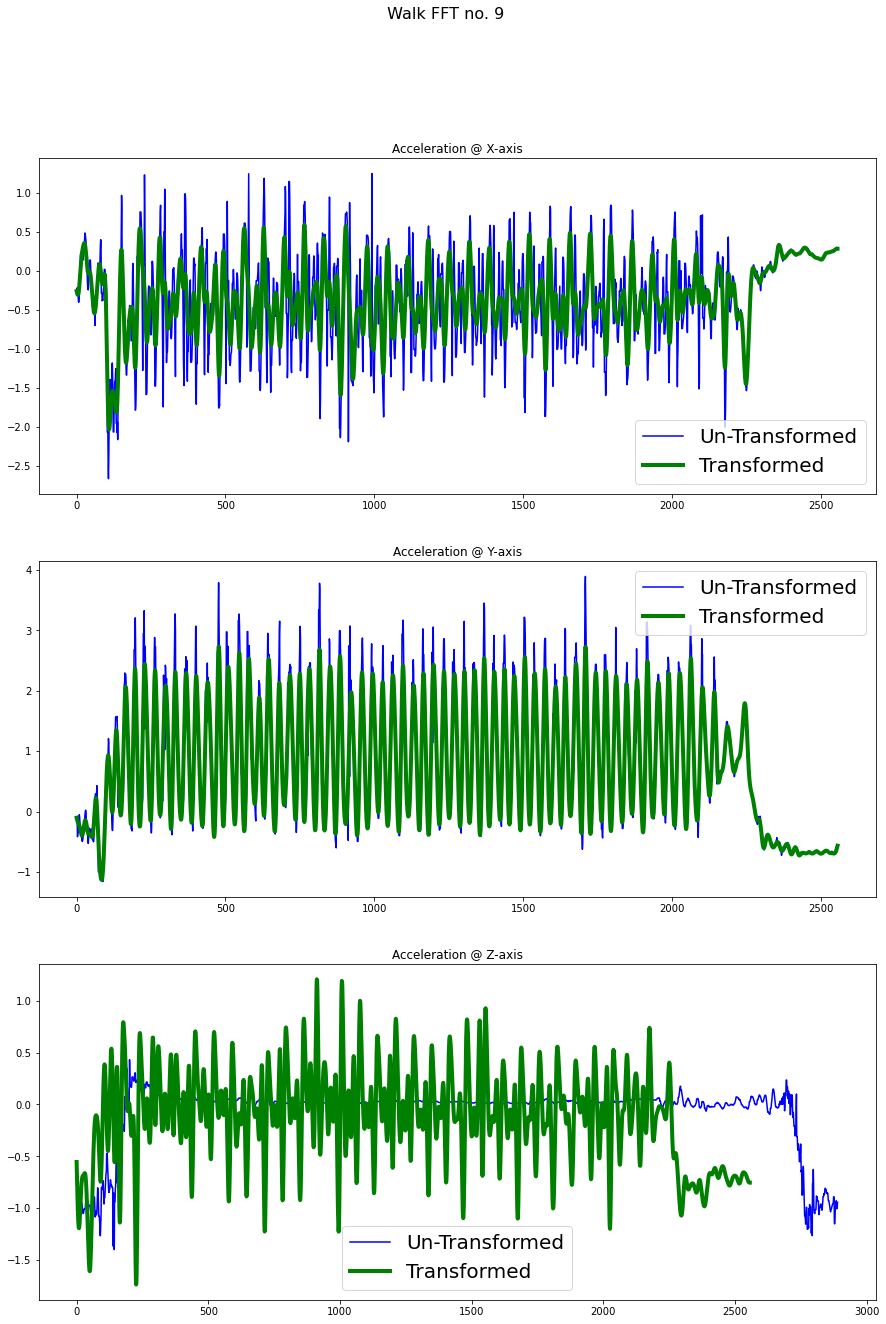

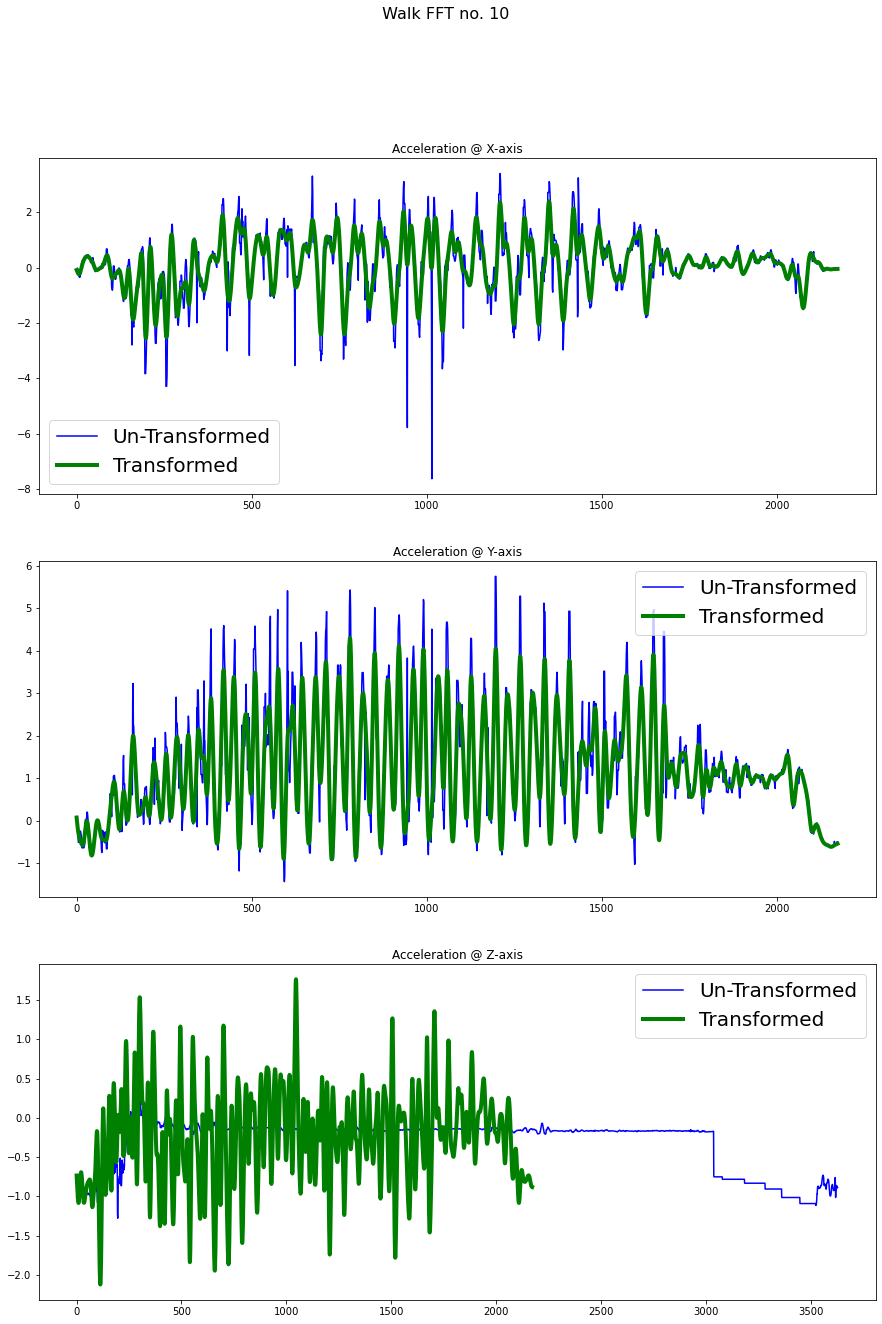

In [22]:
#####Transformations for running

for i in range (10):
    fig, ax = plt.subplots(3,figsize=(15,21))
    
    fig.suptitle(' Walk FFT no. {}'.format(i+1), fontsize=16)
    
    ax[0].plot(running_np[i]["gFx"],'blue',label='Un-Transformed')
    ax[0].plot(butter_worth_running[i]["AccX"],'green', label='Transformed', linewidth=4.0)
    ax[0].legend(fontsize=20)
    ax[0].title.set_text('Acceleration @ X-axis')
    
    ax[1].plot(running_np[i]["gFy"],'blue',label='Un-Transformed')
    ax[1].plot(butter_worth_running[i]["AccY"],'green', label='Transformed', linewidth=4.0)
    ax[1].legend(fontsize=20)
    ax[1].title.set_text('Acceleration @ Y-axis')
    
    ax[2].plot(standing_np[i]["gFz"],'blue',label='Un-Transformed')
    ax[2].plot(butter_worth_running[i]["AccZ"],'green', label='Transformed', linewidth=4.0)
    ax[2].legend(fontsize=20)
    ax[2].title.set_text('Acceleration @ Z-axis')
    

In [24]:
########Save the running Cleaned/Transformed data here ######
for i in range(10):
    butter_worth_running[i].to_csv("cleaned/run{}.csv".format(i+1), sep = ';',index=False)

In [25]:
standingt1=pd.read_csv("cleaned/standing1.csv")

standingt1

Time;AccX;AccY;AccZ;Acc-old;Acc-trns
0     56:10.0;0.024732559817863556;-0.41820901639781...
1     56:10.0;0.023744167598472664;-0.41937542326997...
2     56:10.0;0.022699888442946847;-0.42053034265280...
3     56:10.1;0.0215307875835591;-0.4216642922900696...
4     56:10.1;0.02019049882597229;-0.422768916684064...
...                                                 ...
1735  56:27.3;0.0006841611444076225;-0.4026604945301...
1736  56:27.3;0.002158846362385298;-0.40141182138931...
1737  56:27.3;0.0036664891120164757;-0.4001544218108...
1738  56:27.3;0.005178964718914626;-0.39891889240278...
1739  56:27.3;0.006660737960176455;-0.39773061523898...

[1740 rows x 1 columns]